<a href="https://colab.research.google.com/github/vamado09/Applied-Data-Science/blob/main/Week5_VicenteDeLeon1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vicente De Leon

IU_id: 2001014594

APPLIED DATA SCIENCE: 9998

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_digits
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [17]:
import helpers_05_08

# Decision Trees:

Decision trees provide a clear and intuitive way to make decisions based on data by modeling the relationships between different variables. It consists of nodes representing decisions or tests on attributes, branches representing the outcome of these decisions, and leaf nodes representing final outcomes or predictions. Each internal node corresponds to a test on an attribute, each branch corresponds to the result of the test, and each leaf node corresponds to a class label or a continuous value.

**Structure of a Decision Tree**
- Root Node: Represents the entire dataset and the initial decision to be made.
- Internal Nodes: Represent decisions or tests on attributes. Each internal node has one or more branches.
- Branches: Represent the outcome of a decision or test, leading to another node.
- Leaf Nodes: Represent the final decision or prediction. No further splits occur at these nodes.

**How Decision Trees Work?**

- Selecting the Best Attribute: Using a metric like Gini impurity, entropy, or information gain, the best attribute to split the data is selected.
- Splitting the Dataset: The dataset is split into subsets based on the selected attribute.
- Repeating the Process: The process is repeated recursively for each subset, creating a new internal node or leaf node until a stopping criterion is met.

## Motivating Random Forests: Decision Trees

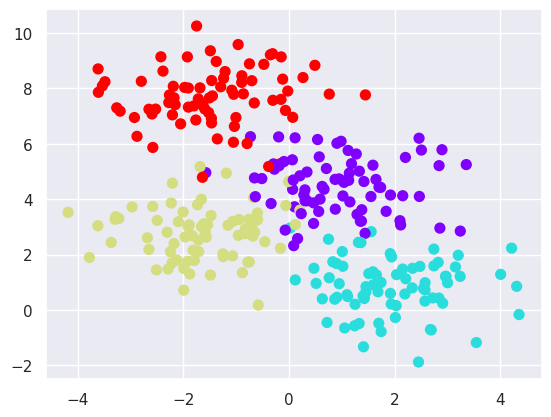

In [8]:
X, y = make_blobs(n_samples=300, centers=4,random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')

A simple decision tree built on this data will iteratively split the data along one or the other axis according to some quantitative criterion, and at each level assign the label of the new region according to a majority vote of points within it. This figure presents a visualization of the first four levels of a decision tree classifier for this data:

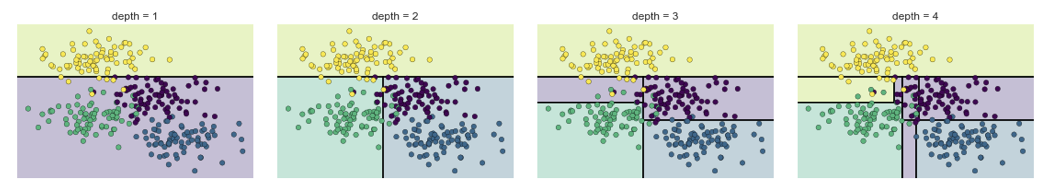

After the first split, every point in the upper branch remains unchanged, so there is no need to further subdivide this branch. Except for nodes that contain all of one color, at each level every region is again split along one of the two features.

In [11]:
tree = DecisionTreeClassifier().fit(X, y)

The below code was designed to visualize the decision boundaries of a classifier model for a 2D dataset.

In [9]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()

    # Plot the training points -> with color indicating their class y
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)

    # Setting axis limits to be tight and remove axis labels for a better visualization
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Fitting the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Creating a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

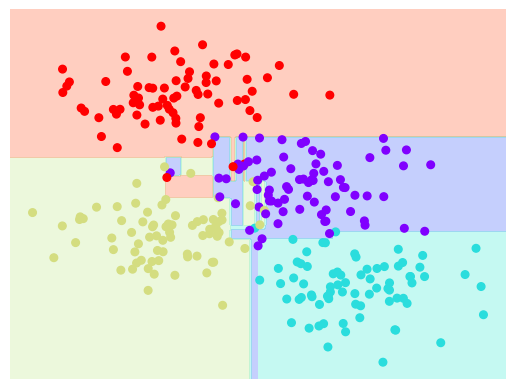

In [10]:
visualize_classifier(DecisionTreeClassifier(), X, y)

For visualization purposes, we can use the helper script included in the following url to bring up an interactive visualization of the decision tree building process: https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/helpers_05_08.py

The below image shows as the depth increases, we tend to get very strangely shaped classification regions; for example, at a depth of five, there is a tall and skinny purple region between the yellow and blue regions. It's clear that this is less a result of the true, intrinsic data distribution, and more a result of the particular sampling or noise properties of the data. That is, this decision tree, even at only five levels deep, is clearly over fitting our data.

interactive(children=(IntSlider(value=5, description='depth', max=5, min=1), Output()), _dom_classes=('widget-…

<function helpers_05_08.plot_tree_interactive.<locals>.interactive_tree(depth=5)>

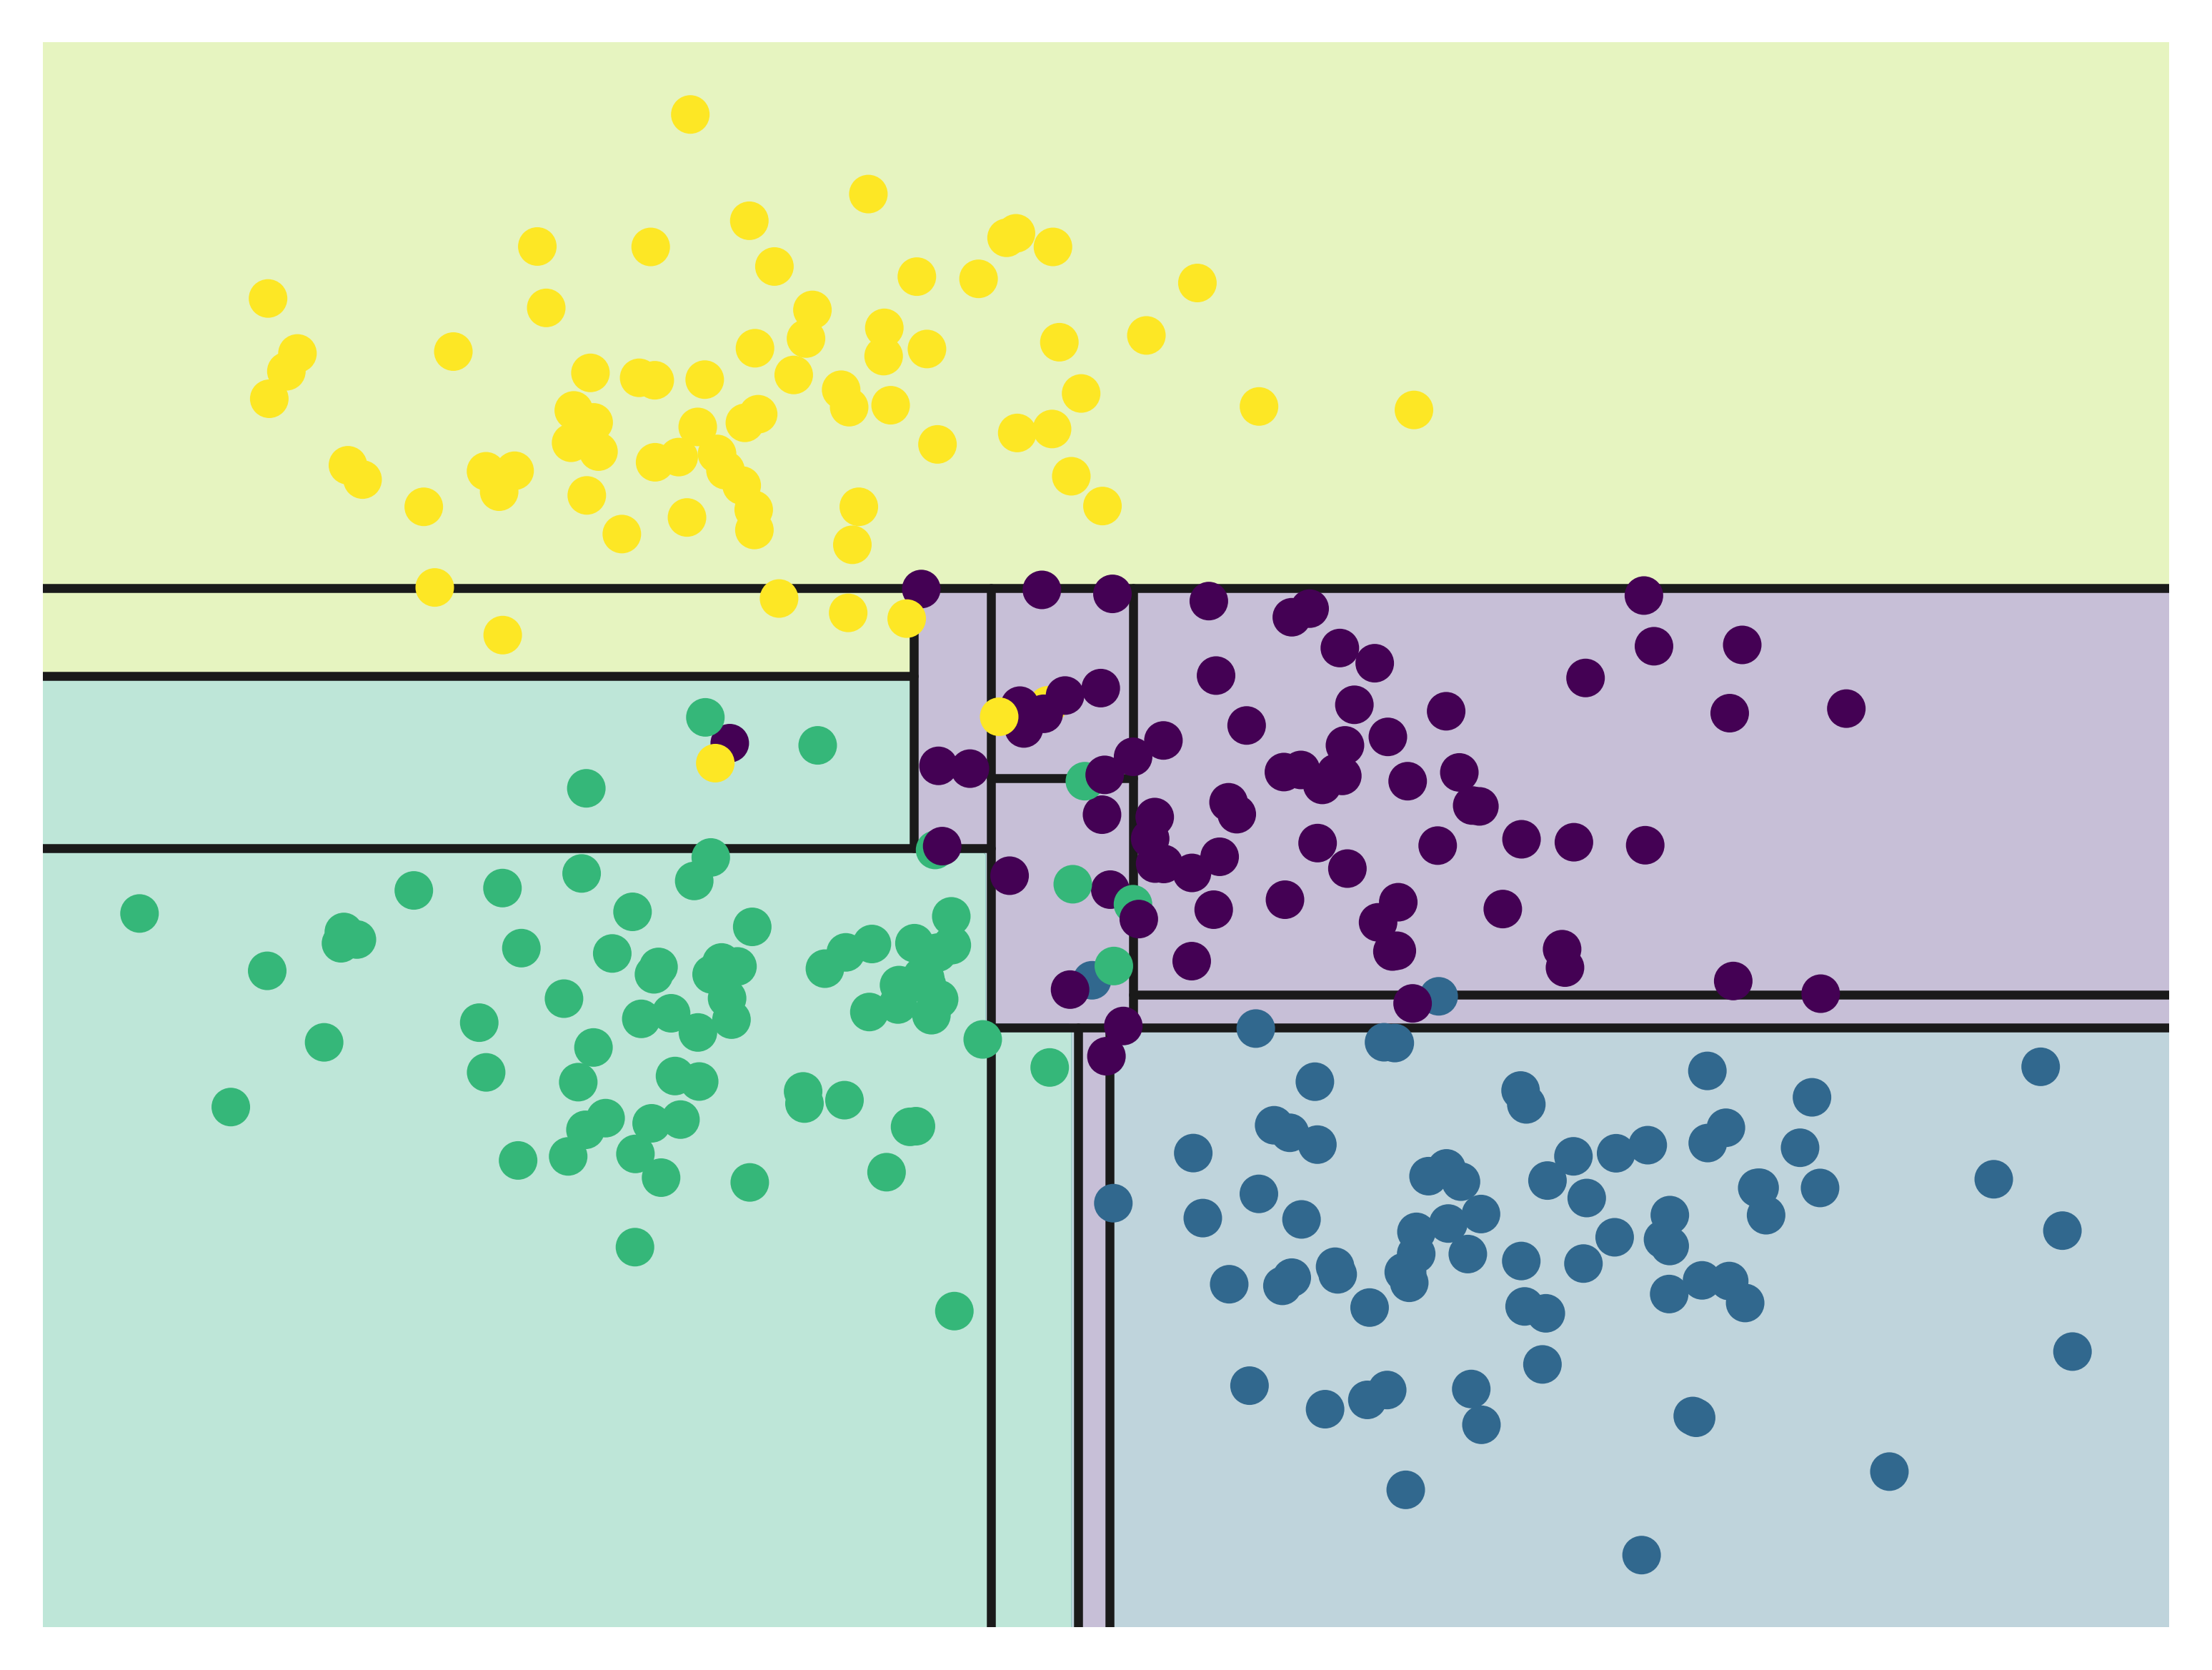

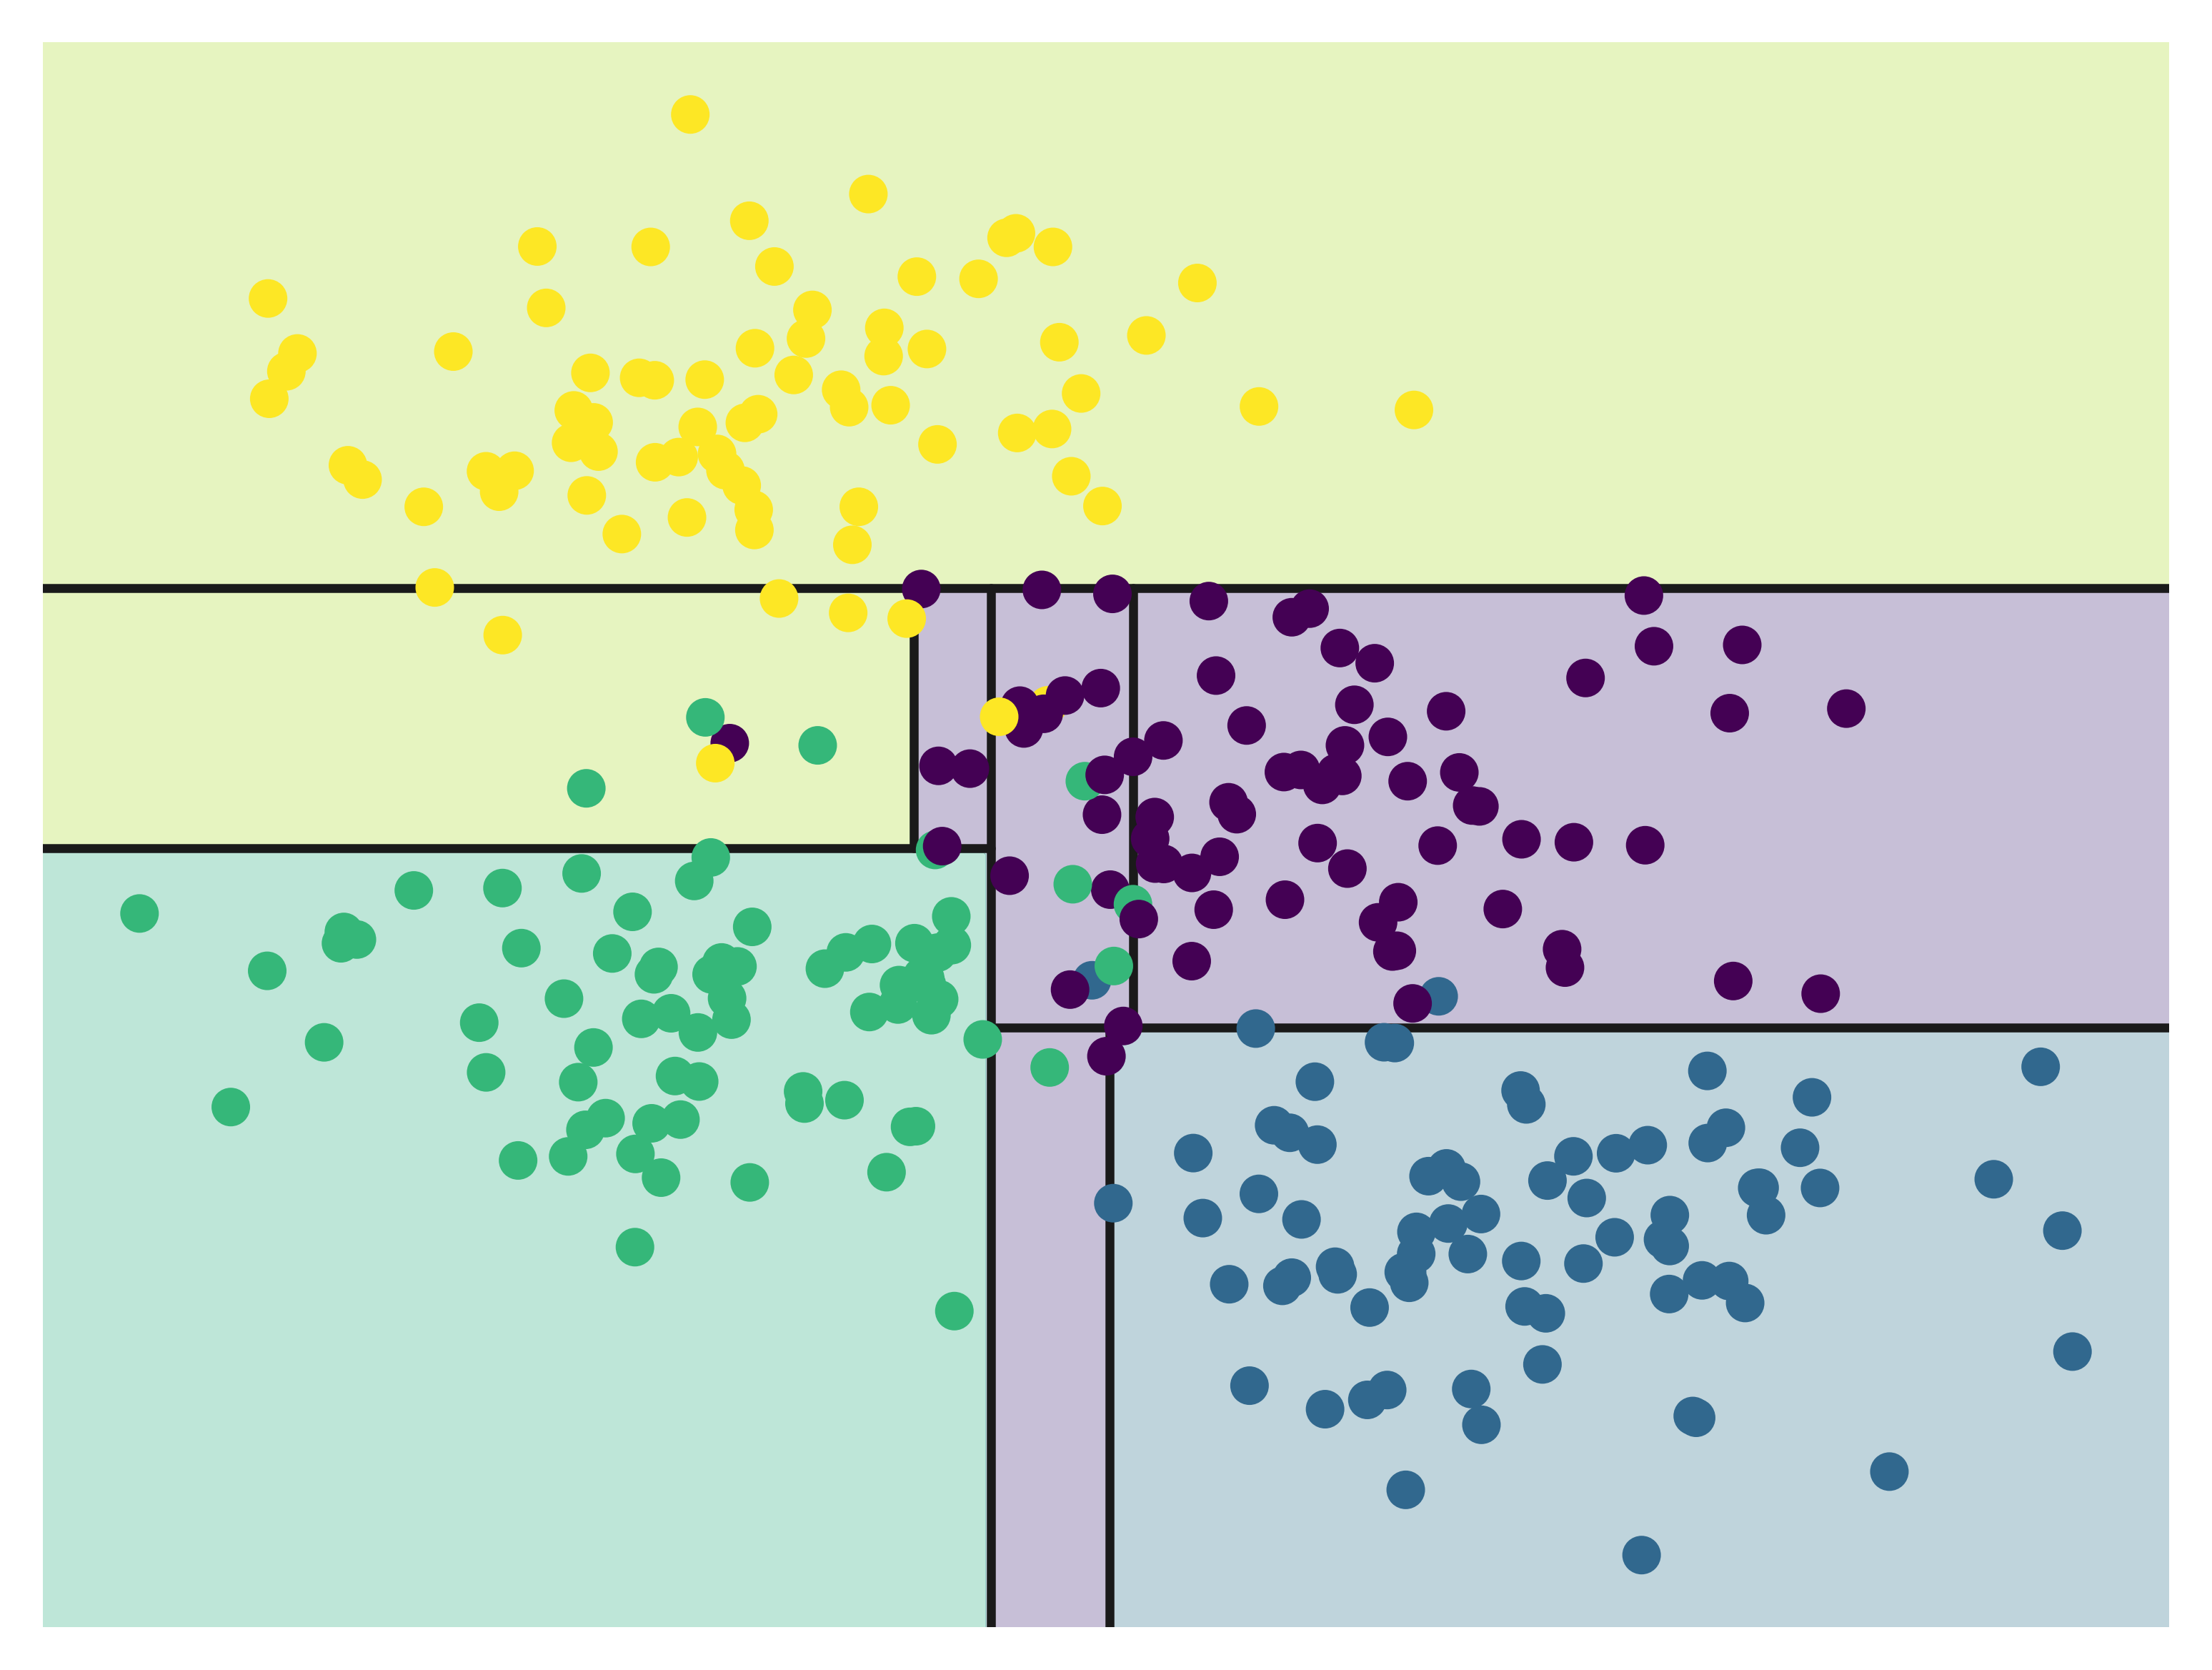

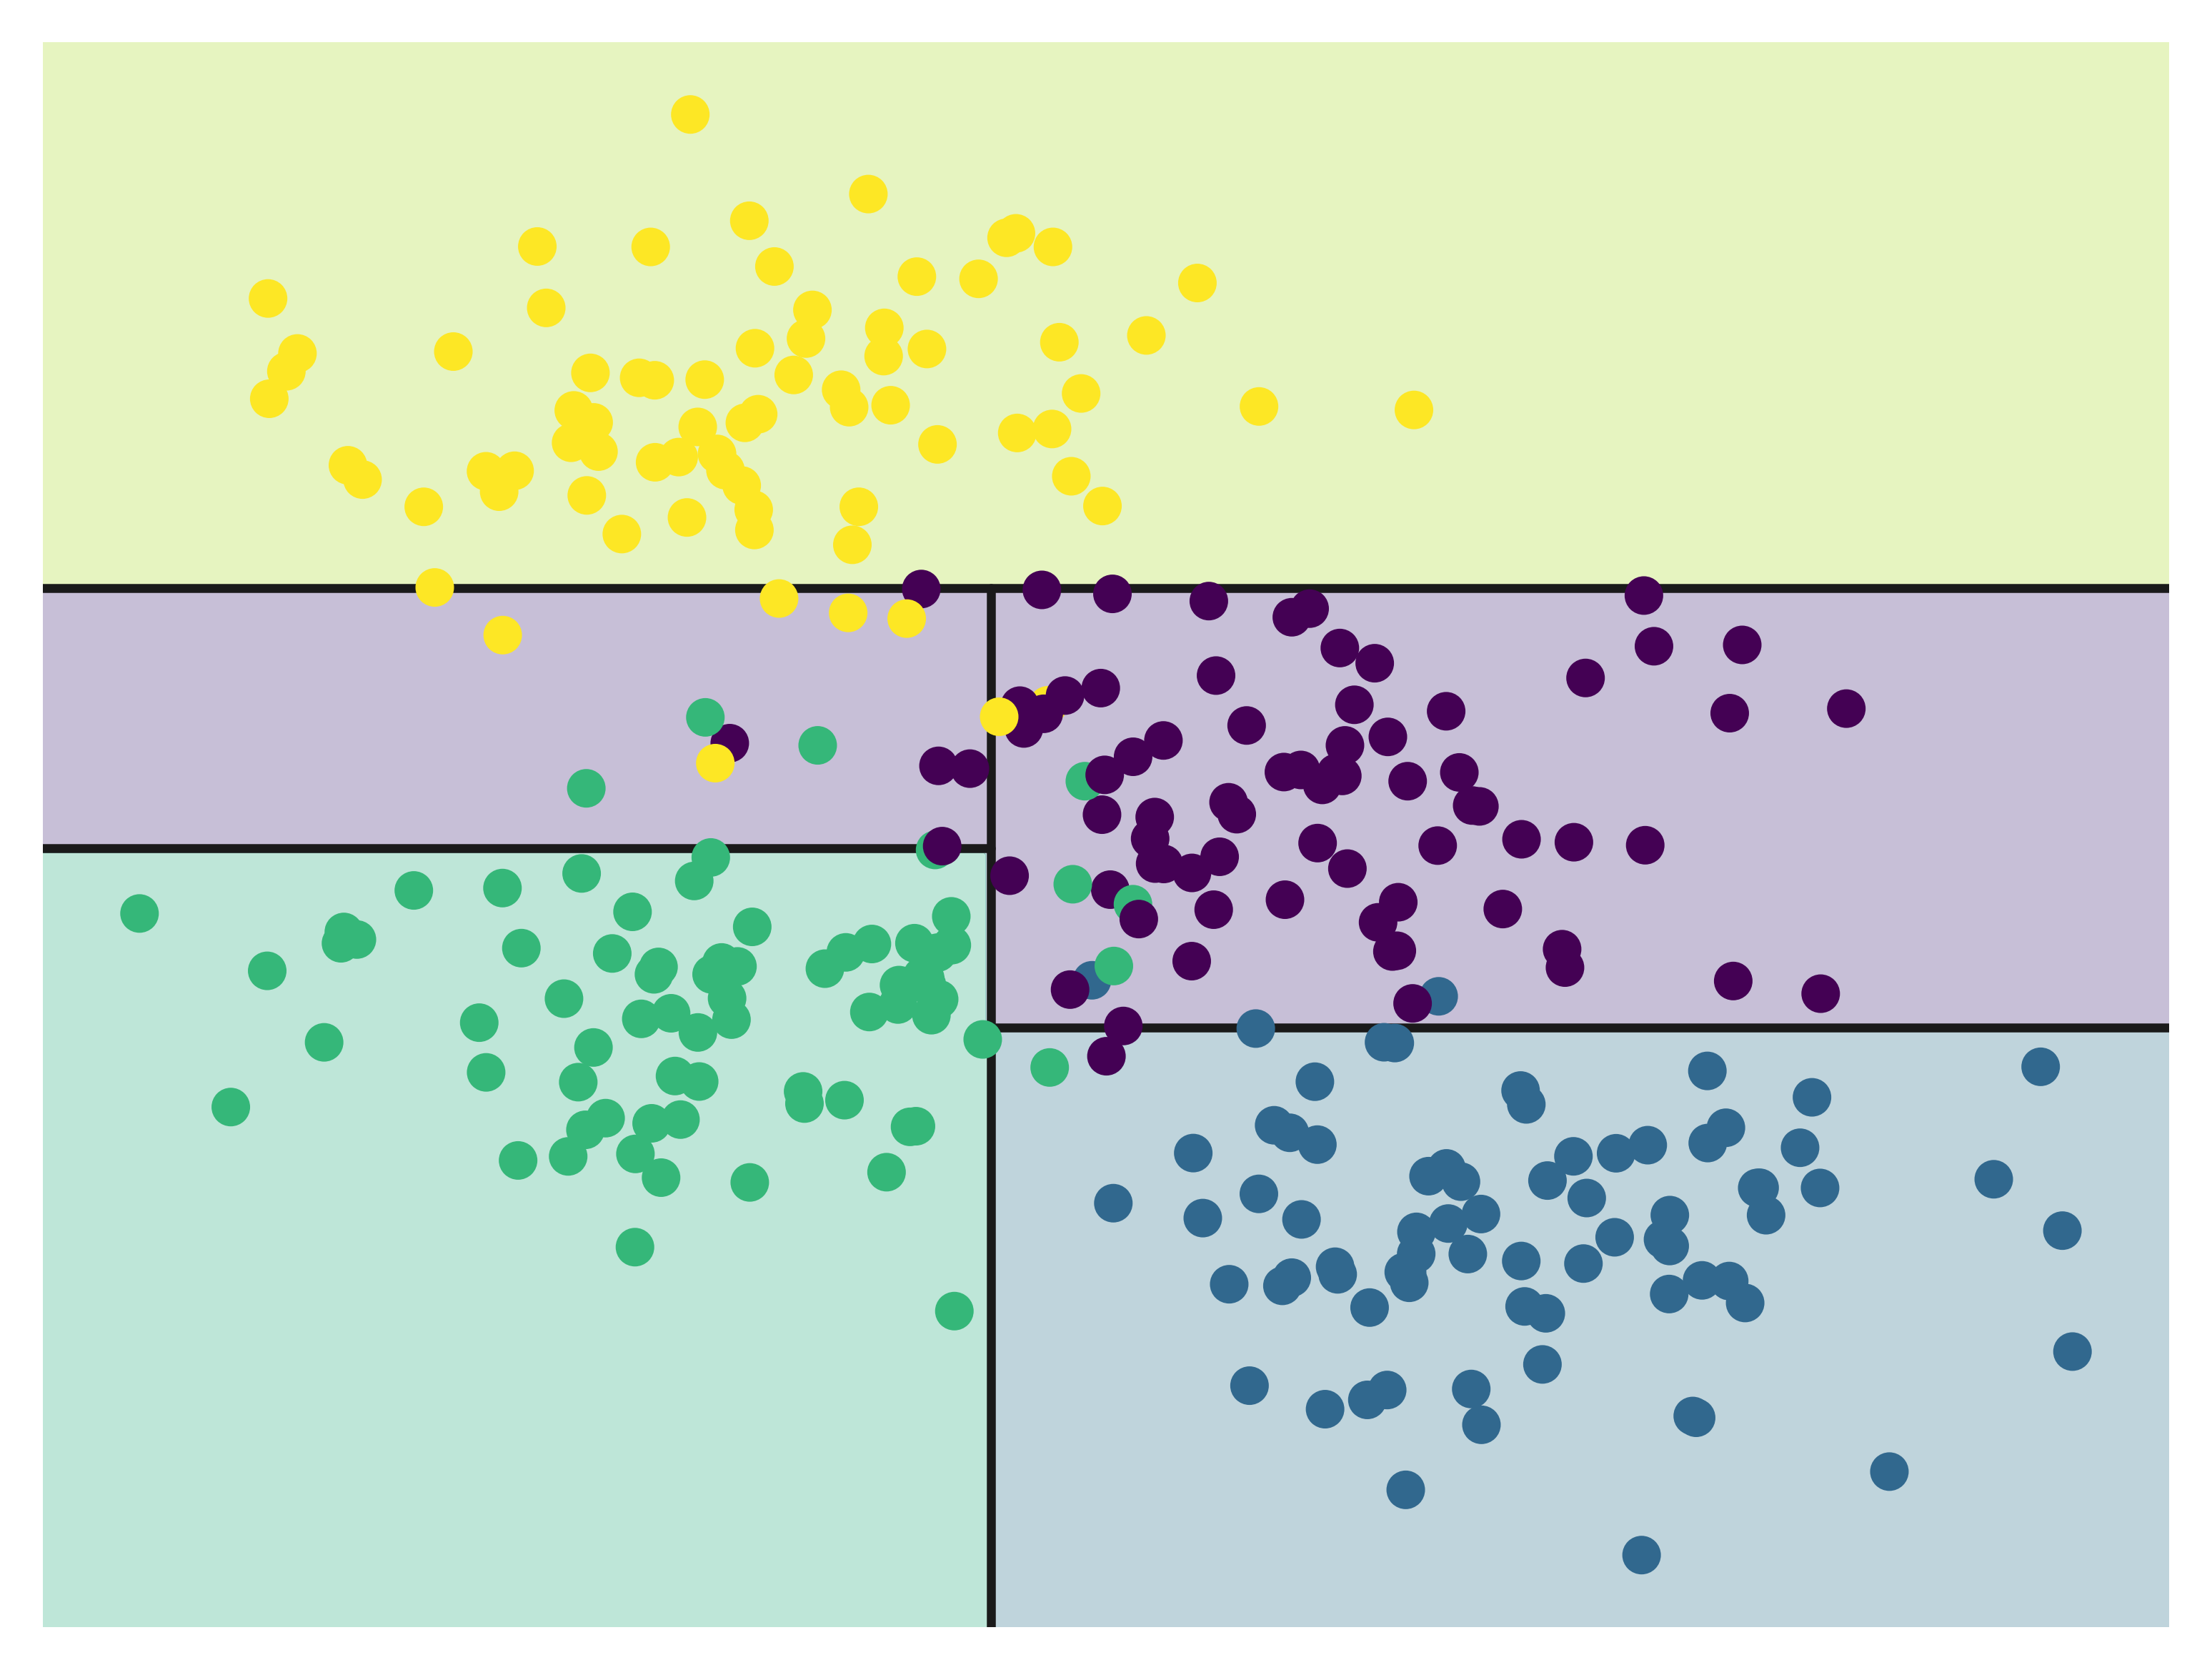

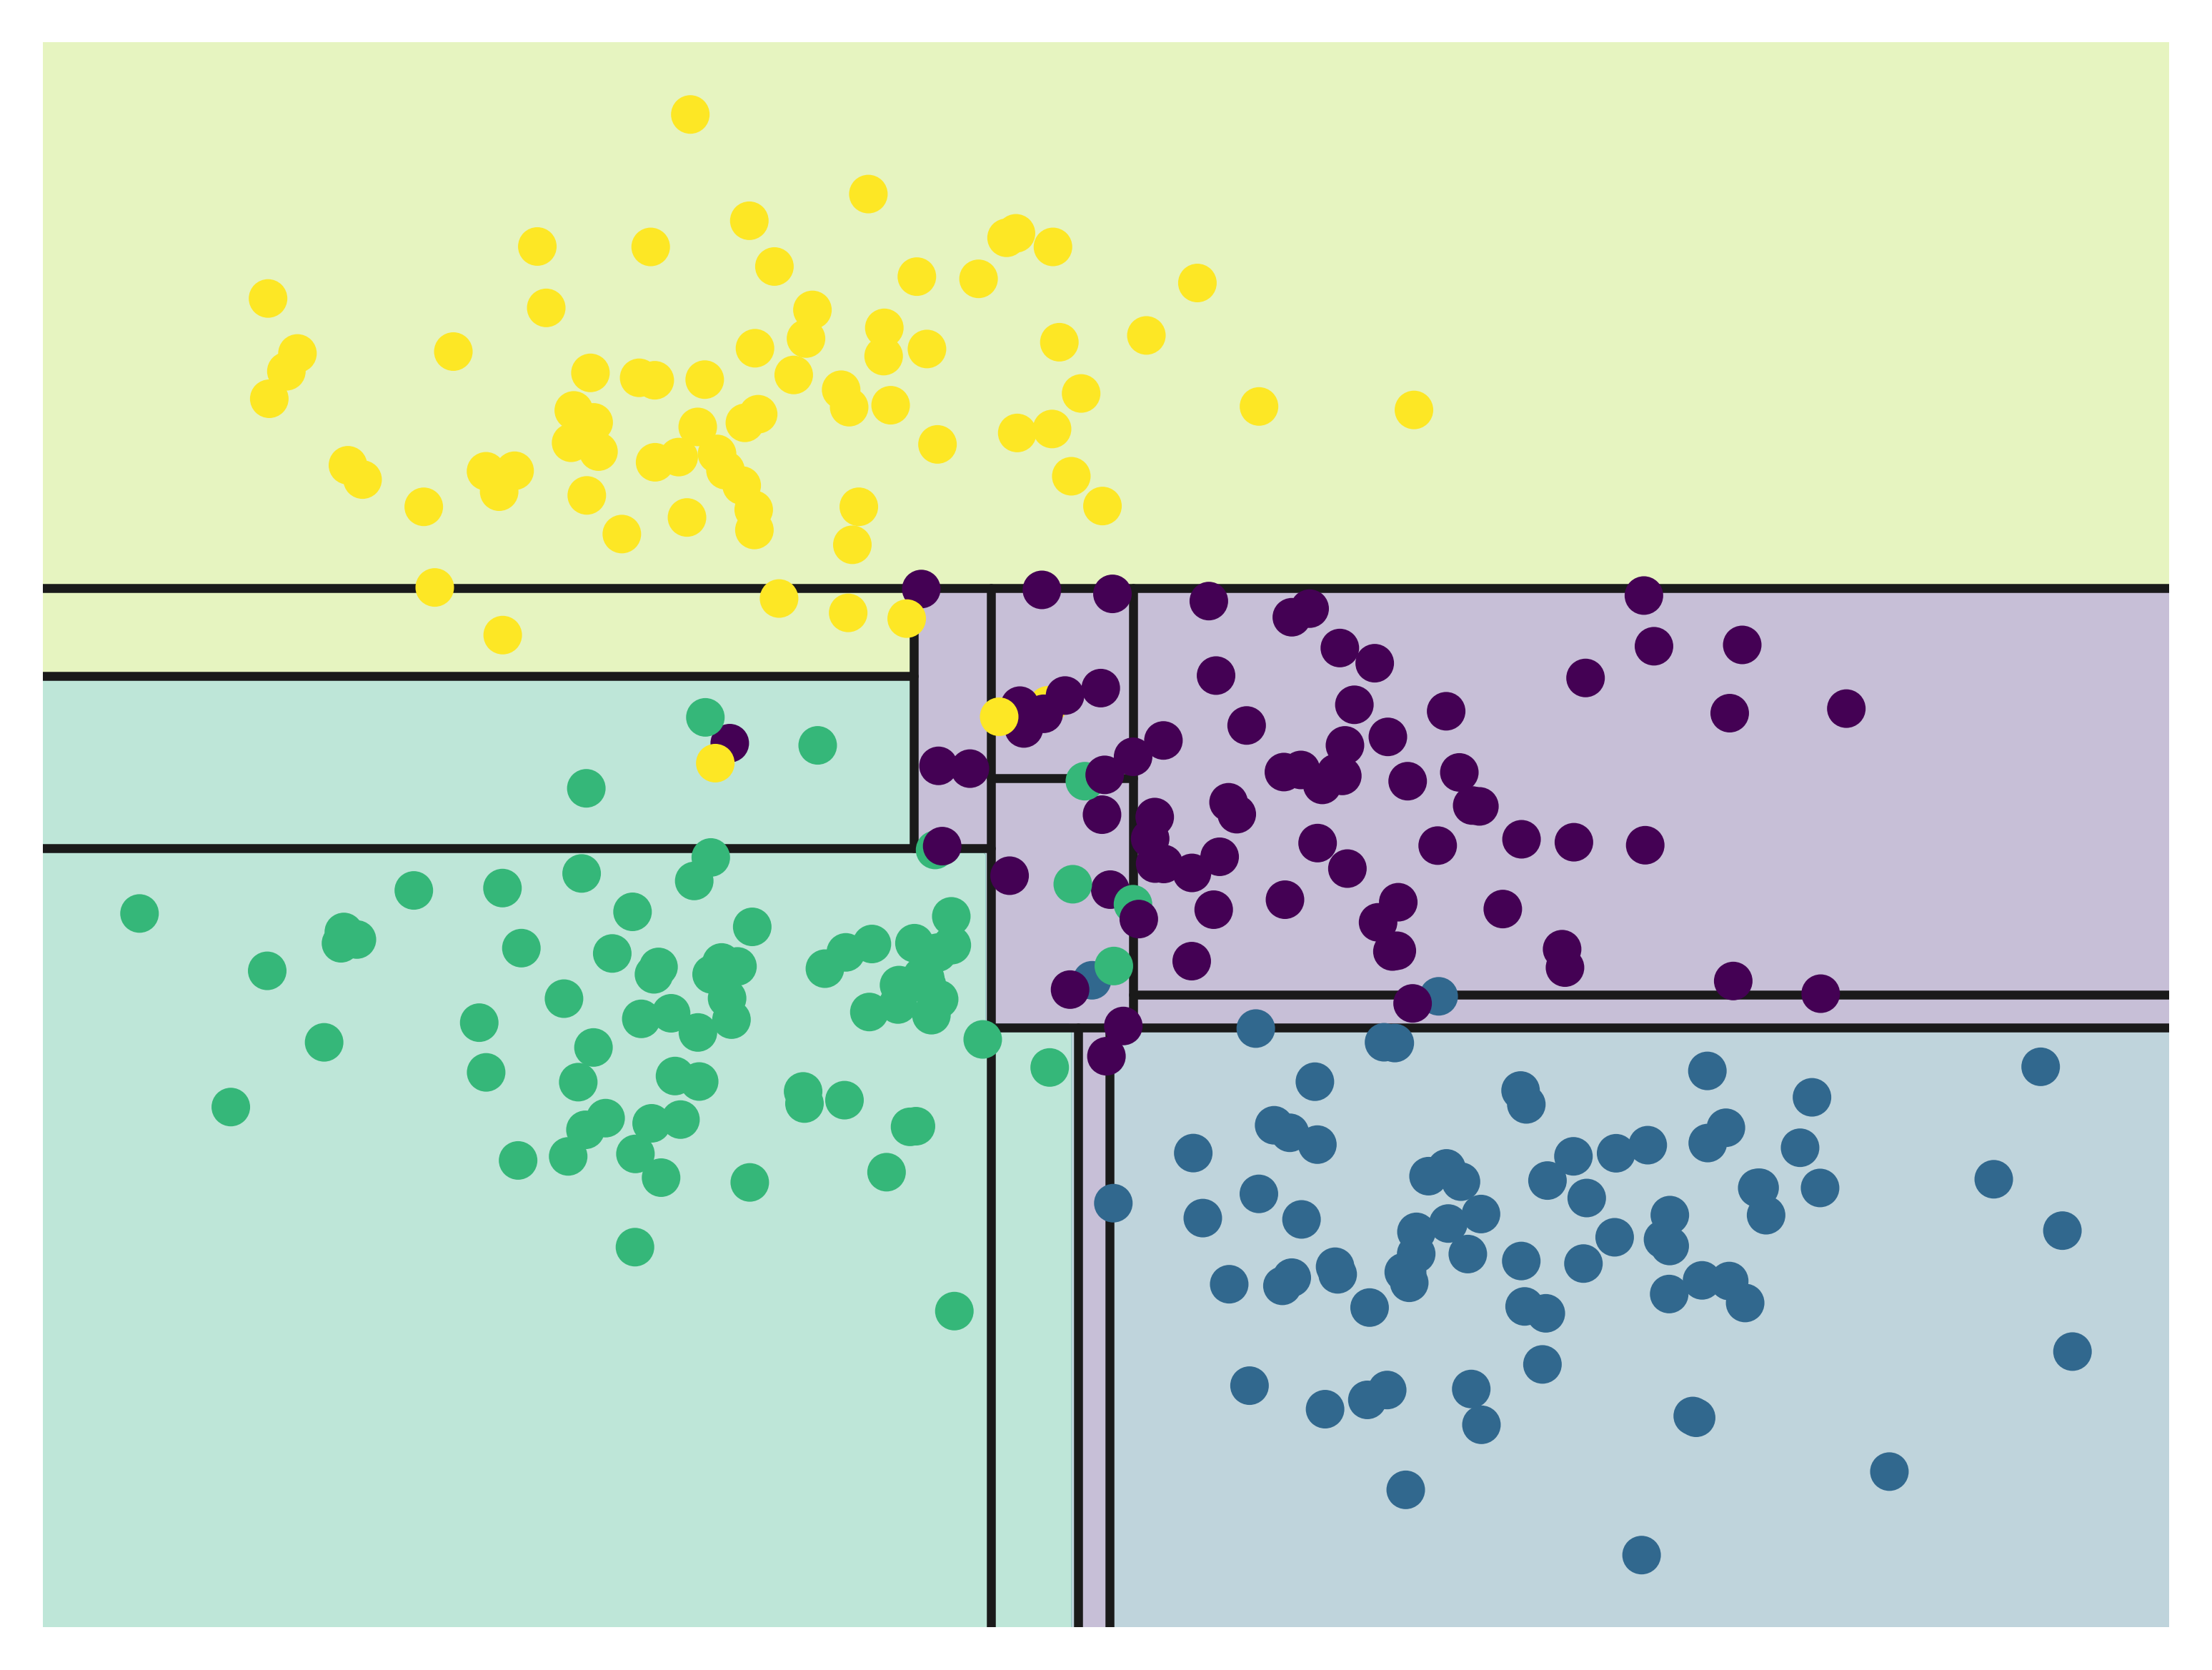

In [16]:
helpers_05_08.plot_tree_interactive(X, y)

## Decision Trees and Over Fitting

Such over-fitting turns out to be a general property of decision trees: it is very easy to go too deep in the tree, and thus to fit details of the particular data rather than the overall properties of the distributions they are drawn from. Another way to see this over fitting is to look at models trained on different subsets of the data.

IMPORTANT!

It is clear that in some places, the two trees produce consistent results (example -> in the four corners), while in other places, the two trees give very different classifications (example -> in the regions between any two clusters). The key observation is that the inconsistencies tend to happen where the classification is less certain, and thus by using information from both of these trees, we might come up with a better result.

interactive(children=(IntSlider(value=0, description='random_state'), Output()), _dom_classes=('widget-interac…

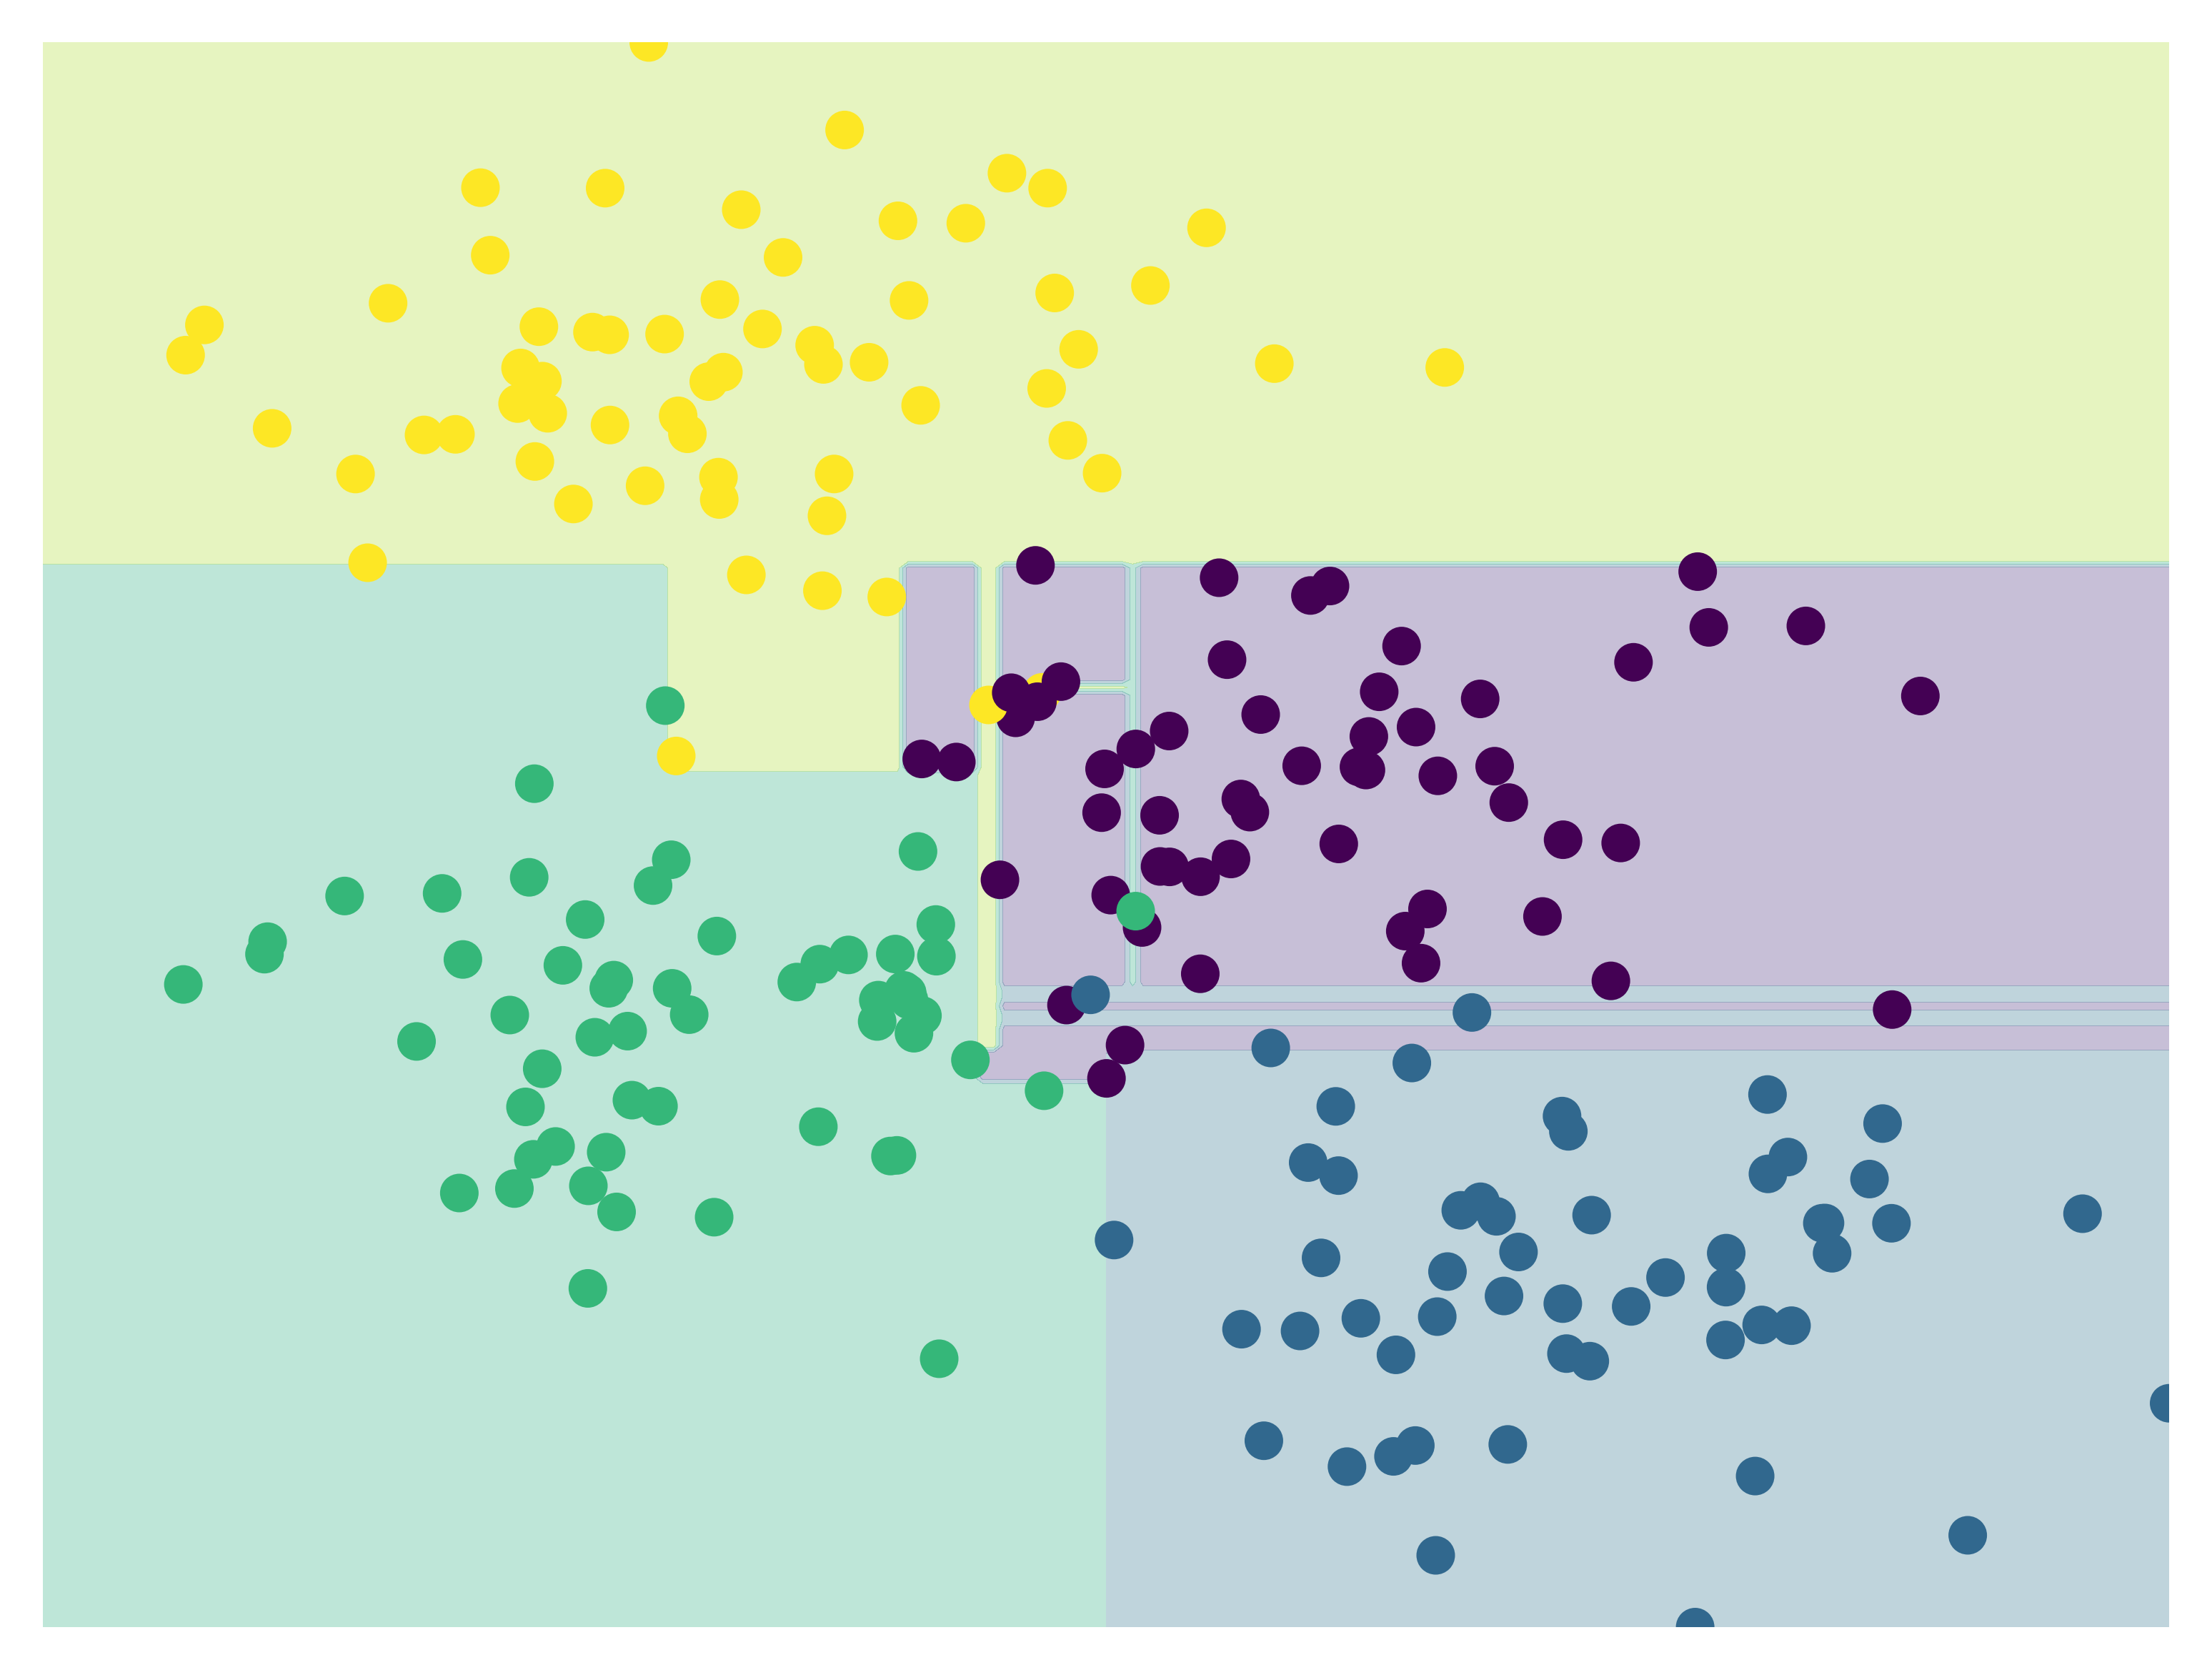

In [18]:
helpers_05_08.randomized_tree_interactive(X, y)

We might expect that using information from many trees would improve our results even further.

# Ensembles of Estimators: Random Forests

It works by creating a number of Decision Trees during the training phase. Each tree is constructed using a random subset of the data set to measure a random subset of features in each partition. This randomness introduces variability among individual trees, reducing the risk of overfitting and improving overall prediction performance.

In prediction, the algorithm aggregates the results of all trees, either by voting (for classification tasks) or by averaging (for regression tasks) This collaborative decision-making process, supported by multiple trees with their insights, provides an example stable and precise results. Random forests are widely used for classification and regression functions, which are known for their ability to handle complex data, reduce overfitting, and provide reliable forecasts in different environments.

The Random forest classifier creates a set of decision trees from a randomly selected subset of the training set. It is a set of decision trees (DT) from a randomly selected subset of the training set and then It collects the votes from different decision trees to decide the final prediction.

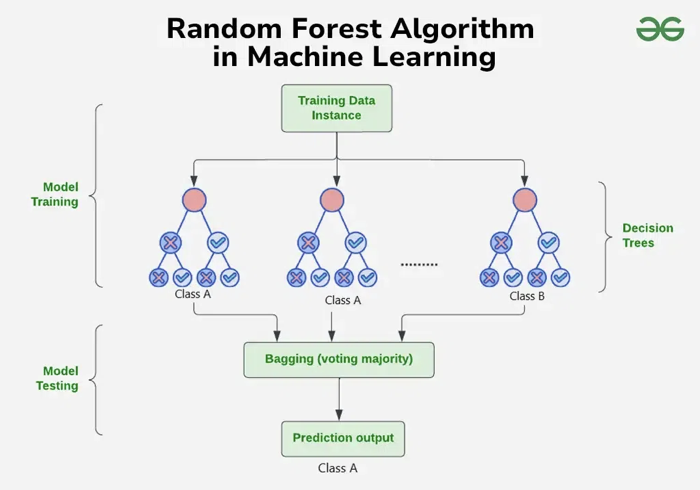

Bagging (or Bootstrap aggregating) is a type of ensemble learning in which multiple base models are trained independently and in parallel on different subsets of the training data. Each subset is generated using bootstrap sampling, in which data points are picked at random with replacement. In the case of the bagging classifier, the final prediction is made by aggregating the predictions of the all-base model using majority voting. In the models of regression, the final prediction is made by averaging the predictions of the all-base model, and that is known as bagging regression.

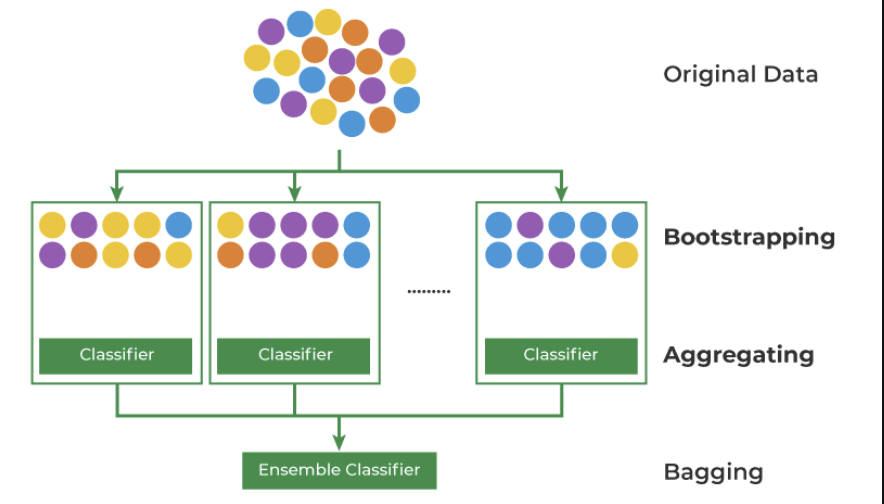

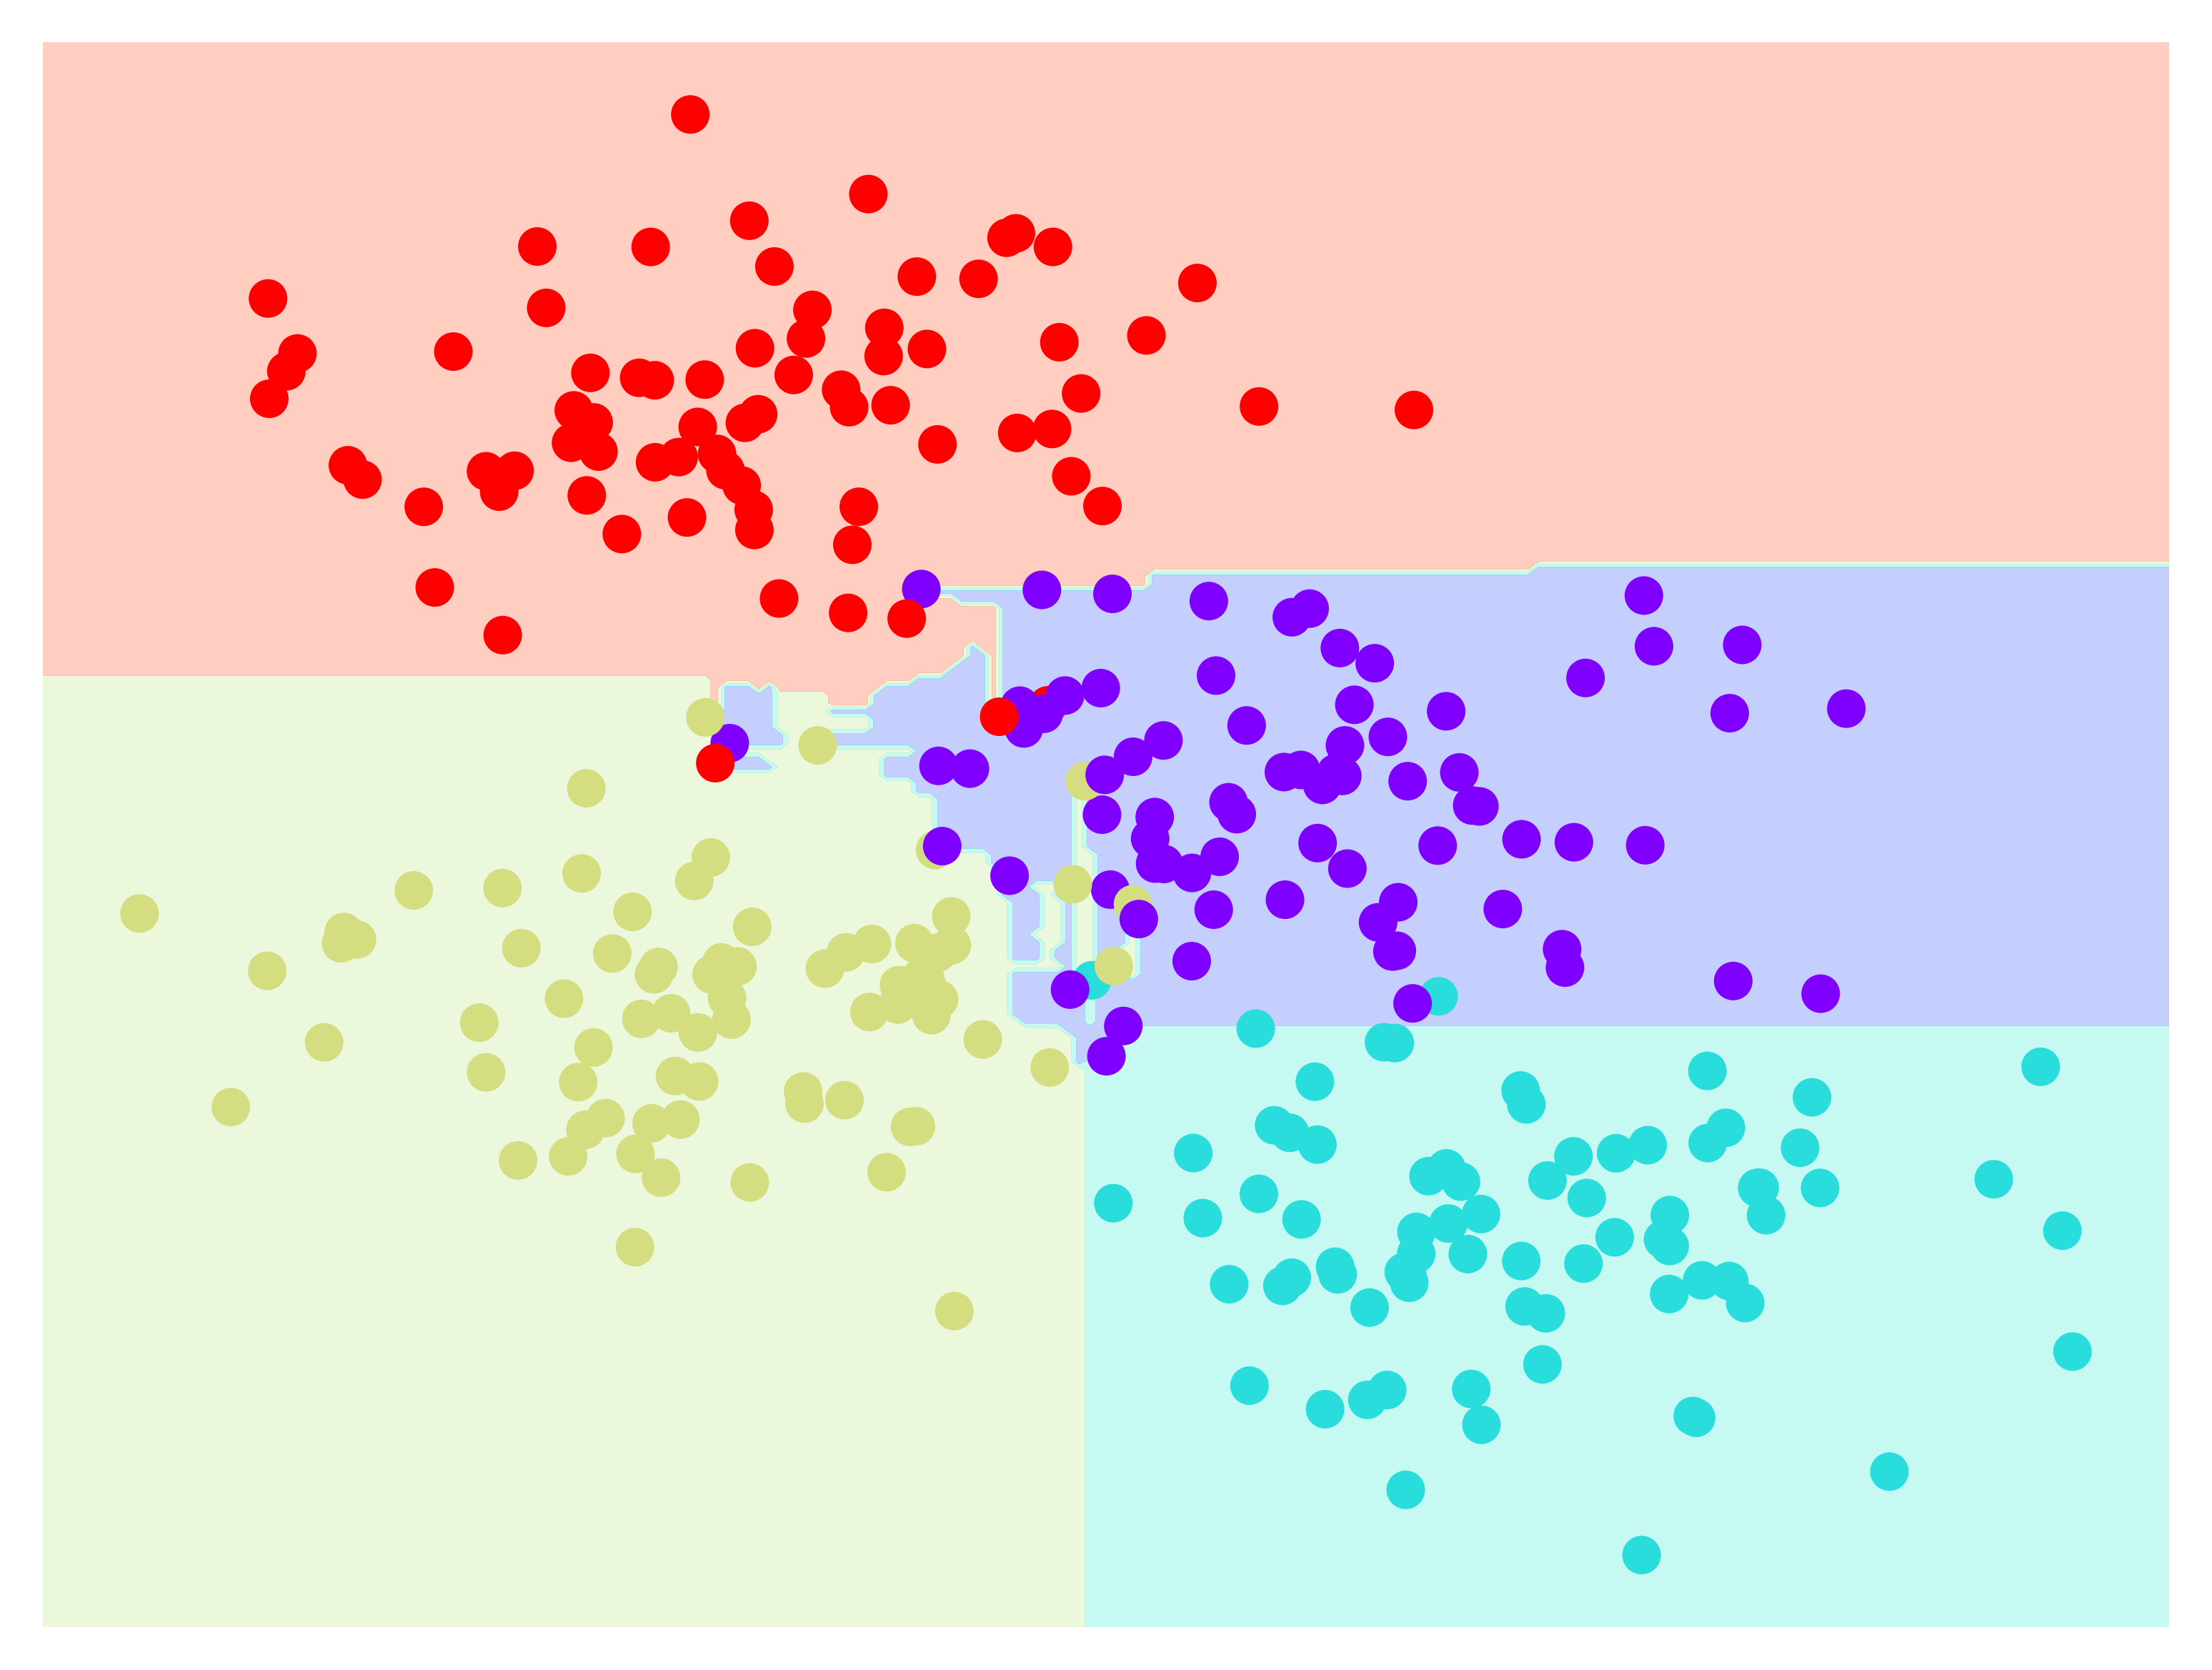

In [20]:
tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1)

bag.fit(X, y)
visualize_classifier(bag, X, y)

In the above image, we have randomized the data by fitting each estimator with a random subset of 80% of the training points. In practice, decision trees are more effectively randomized by injecting some stochasticity in how the splits are chosen: this way all the data contributes to the fit each time, but the results of the fit still have the desired randomness. For example, when determining which feature to split on, the randomized tree might select from among the top several features.

n Scikit-Learn, such an optimized ensemble of randomized decision trees is implemented in the RandomForestClassifier estimator, which takes care of all the randomization automatically. All you need to do is select a number of estimators, and it will very quickly (in parallel, if desired) fit the ensemble of trees:

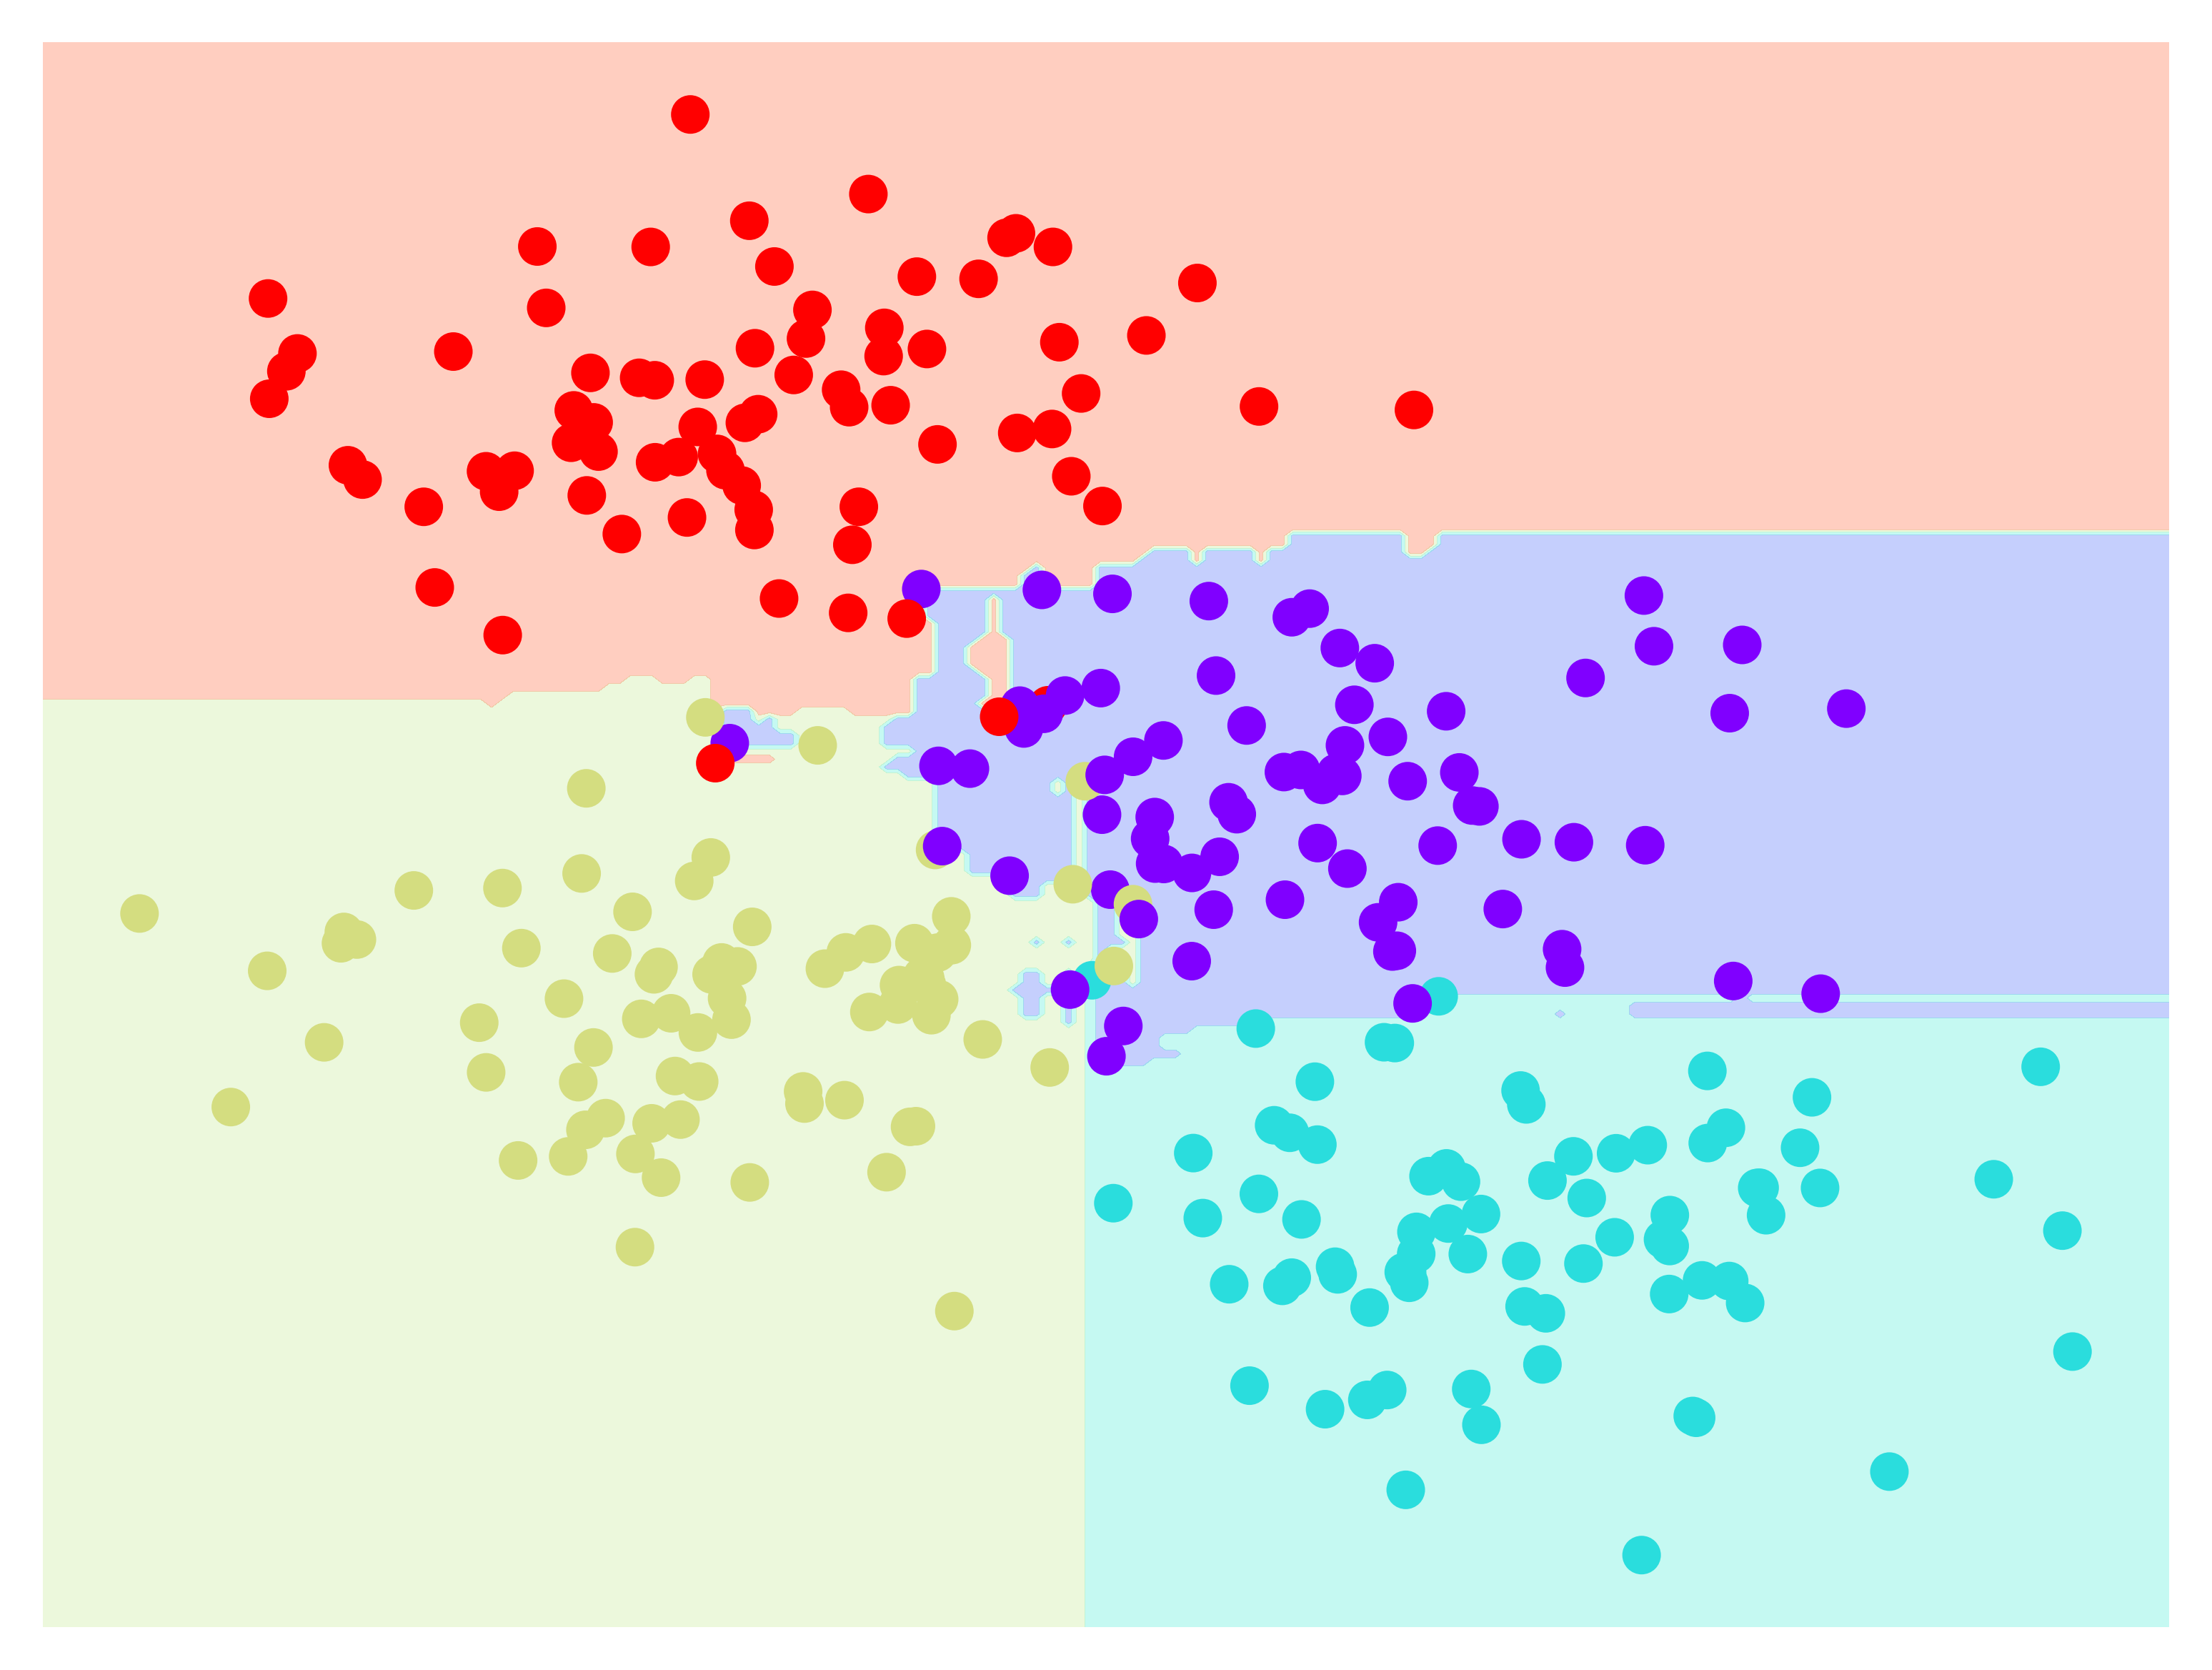

In [22]:
model = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_classifier(model, X, y)

We see that by averaging over 100 randomly perturbed models, we end up with an overall model that is much closer to our intuition about how the parameter space should be split.

# Random Forest Regression

Random Forest Regression in machine learning is an ensemble technique capable of performing both regression and classification tasks with the use of multiple decision trees and a technique called Bootstrap and Aggregation, commonly known as bagging. The basic idea behind this is to combine multiple decision trees in determining the final output rather than relying on individual decision trees.

Random Forest has multiple decision trees as base learning models. We randomly perform row sampling and feature sampling from the dataset forming sample datasets for every model. This part is called Bootstrap.

We need to approach the Random Forest regression technique like any other machine learning technique.

- Design a specific question or data and get the source to determine the required data.
- Make sure the data is in an accessible format else convert it to the required format.
- Specify all noticeable anomalies and missing data points that may be required to achieve the required data.
- Create a machine-learning model.
- Set the baseline model that you want to achieve
- Train the data machine learning model.
- Provide an insight into the model with test data
- Now compare the performance metrics of both the test data and the predicted data from the model.
- If it doesn’t satisfy your expectations, you can try improving your model accordingly or dating your data, or using another data modeling technique.
- At this stage, you interpret the data you have gained and report accordingly.

In [23]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(200)

<ErrorbarContainer object of 3 artists>

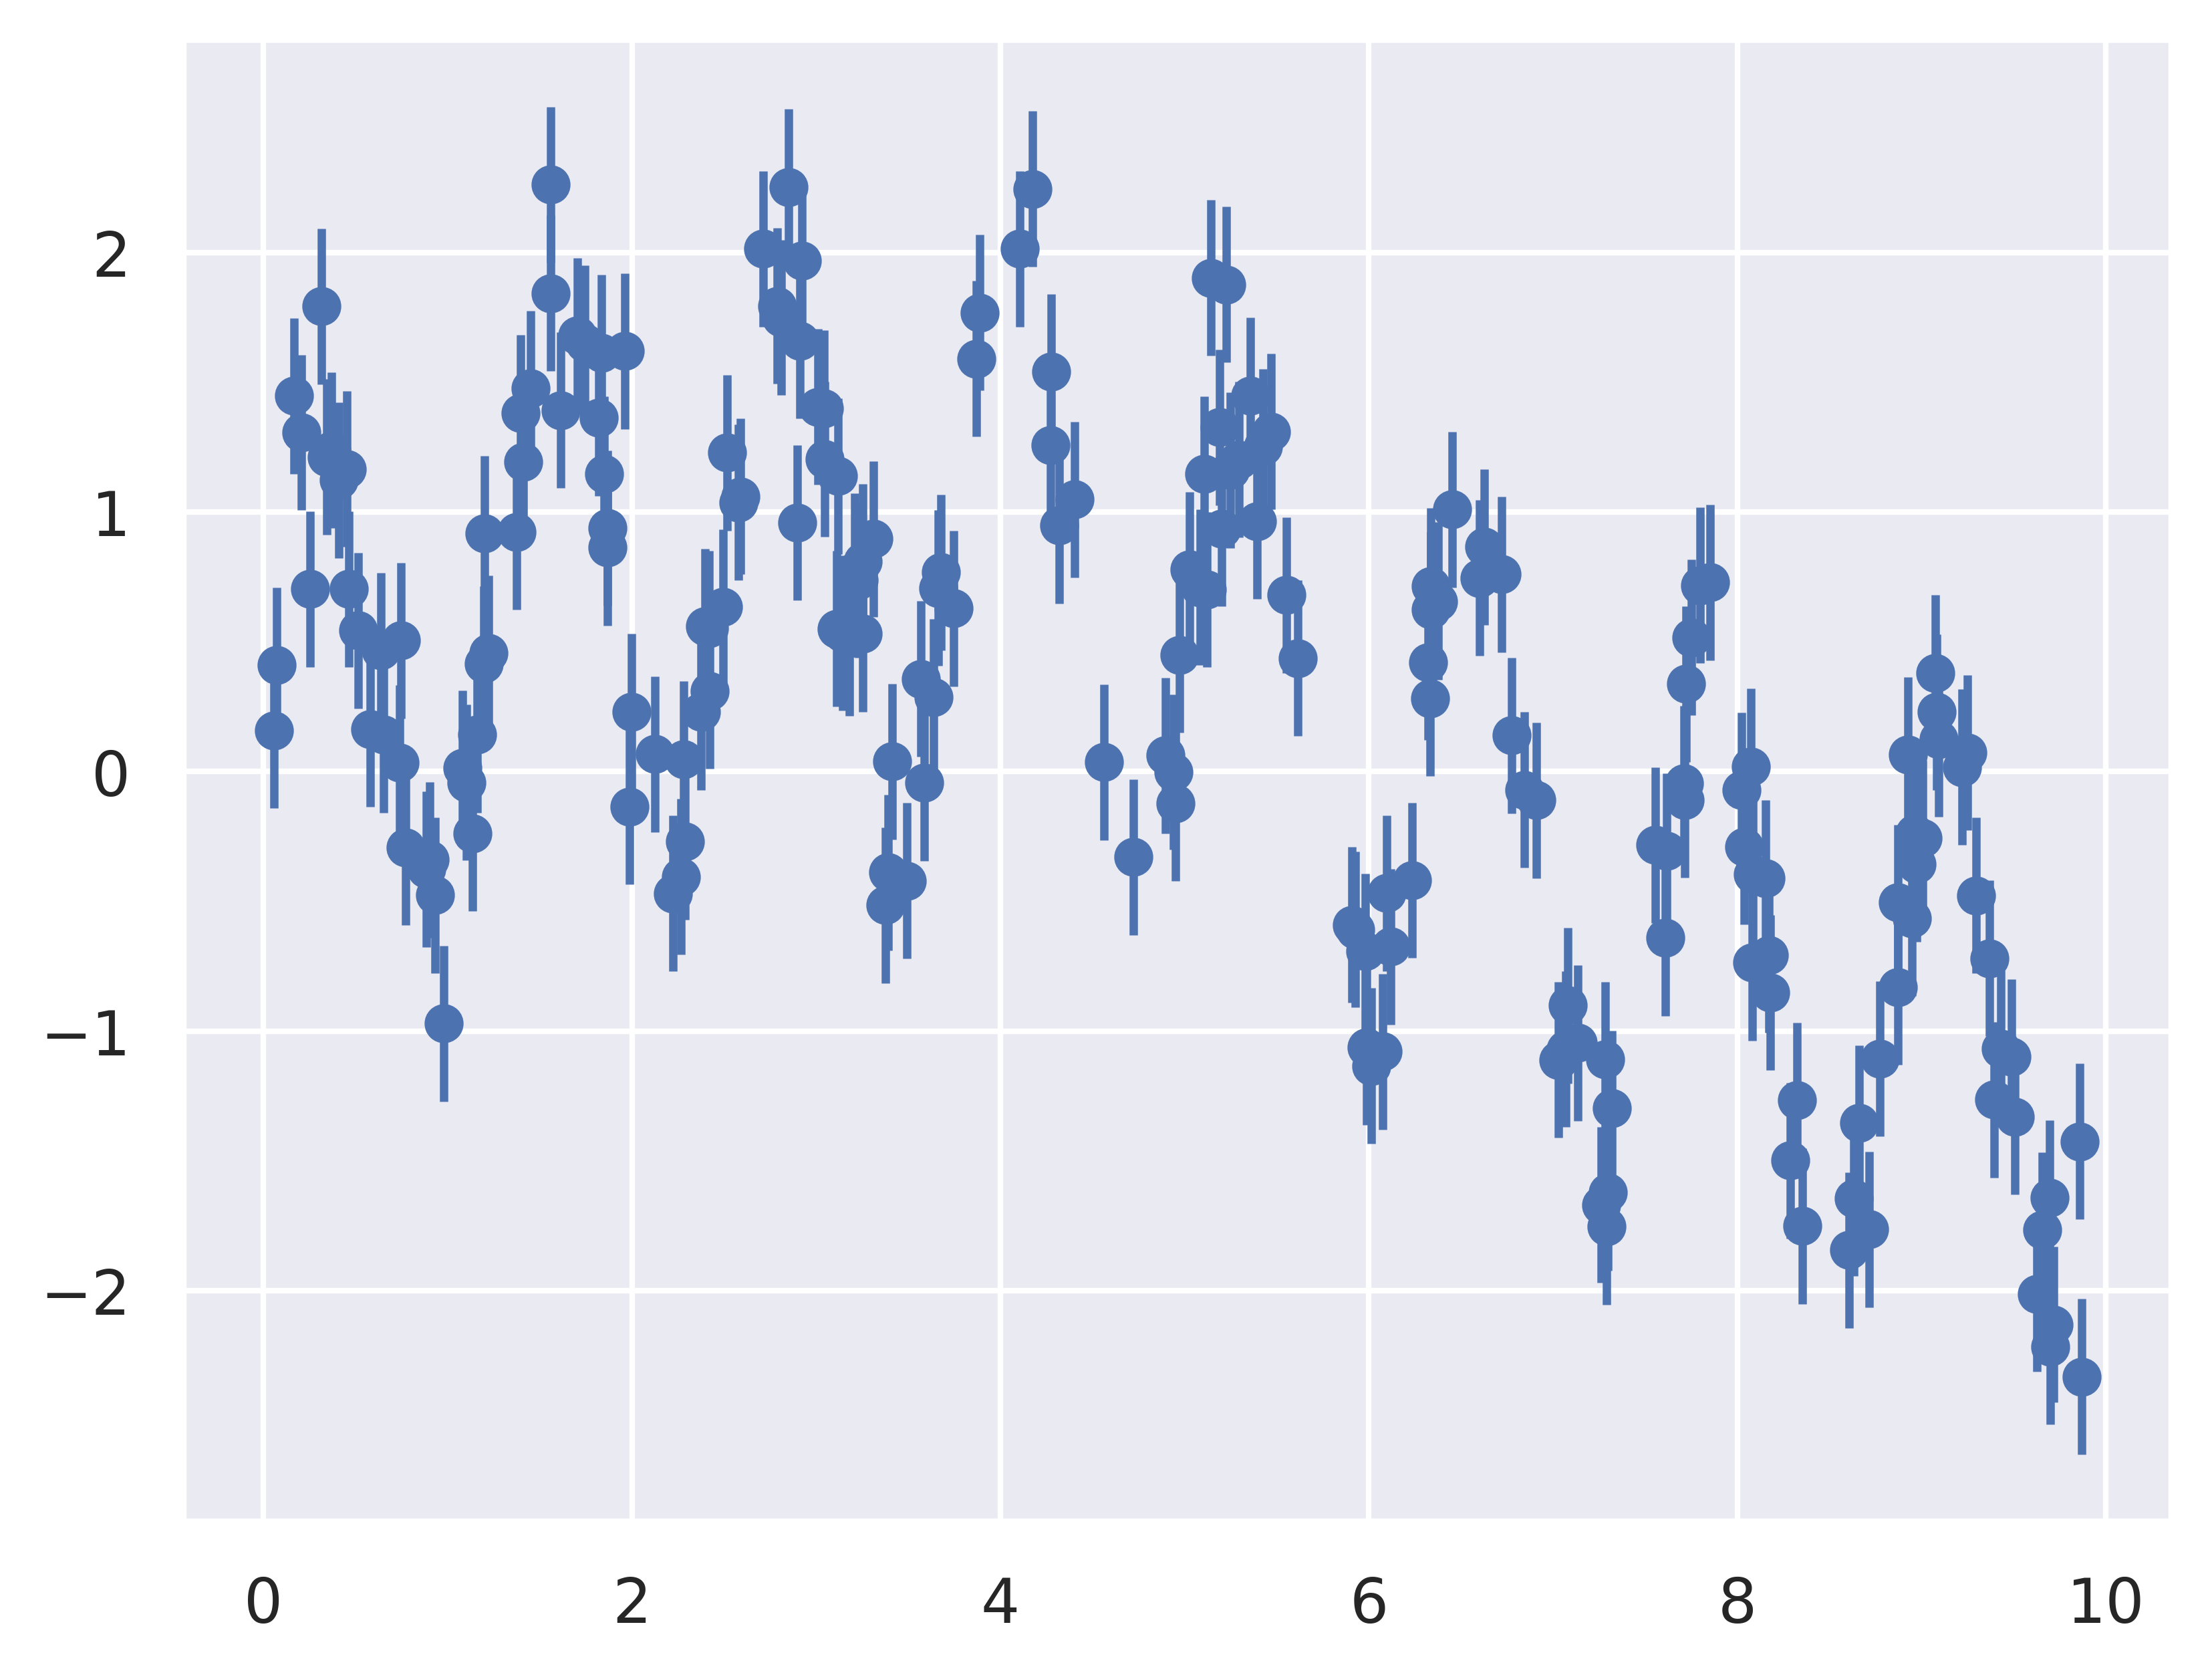

In [24]:
def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * rng.randn(len(x))

    return slow_oscillation + fast_oscillation + noise

y = model(x)
plt.errorbar(x, y, 0.3, fmt='o')

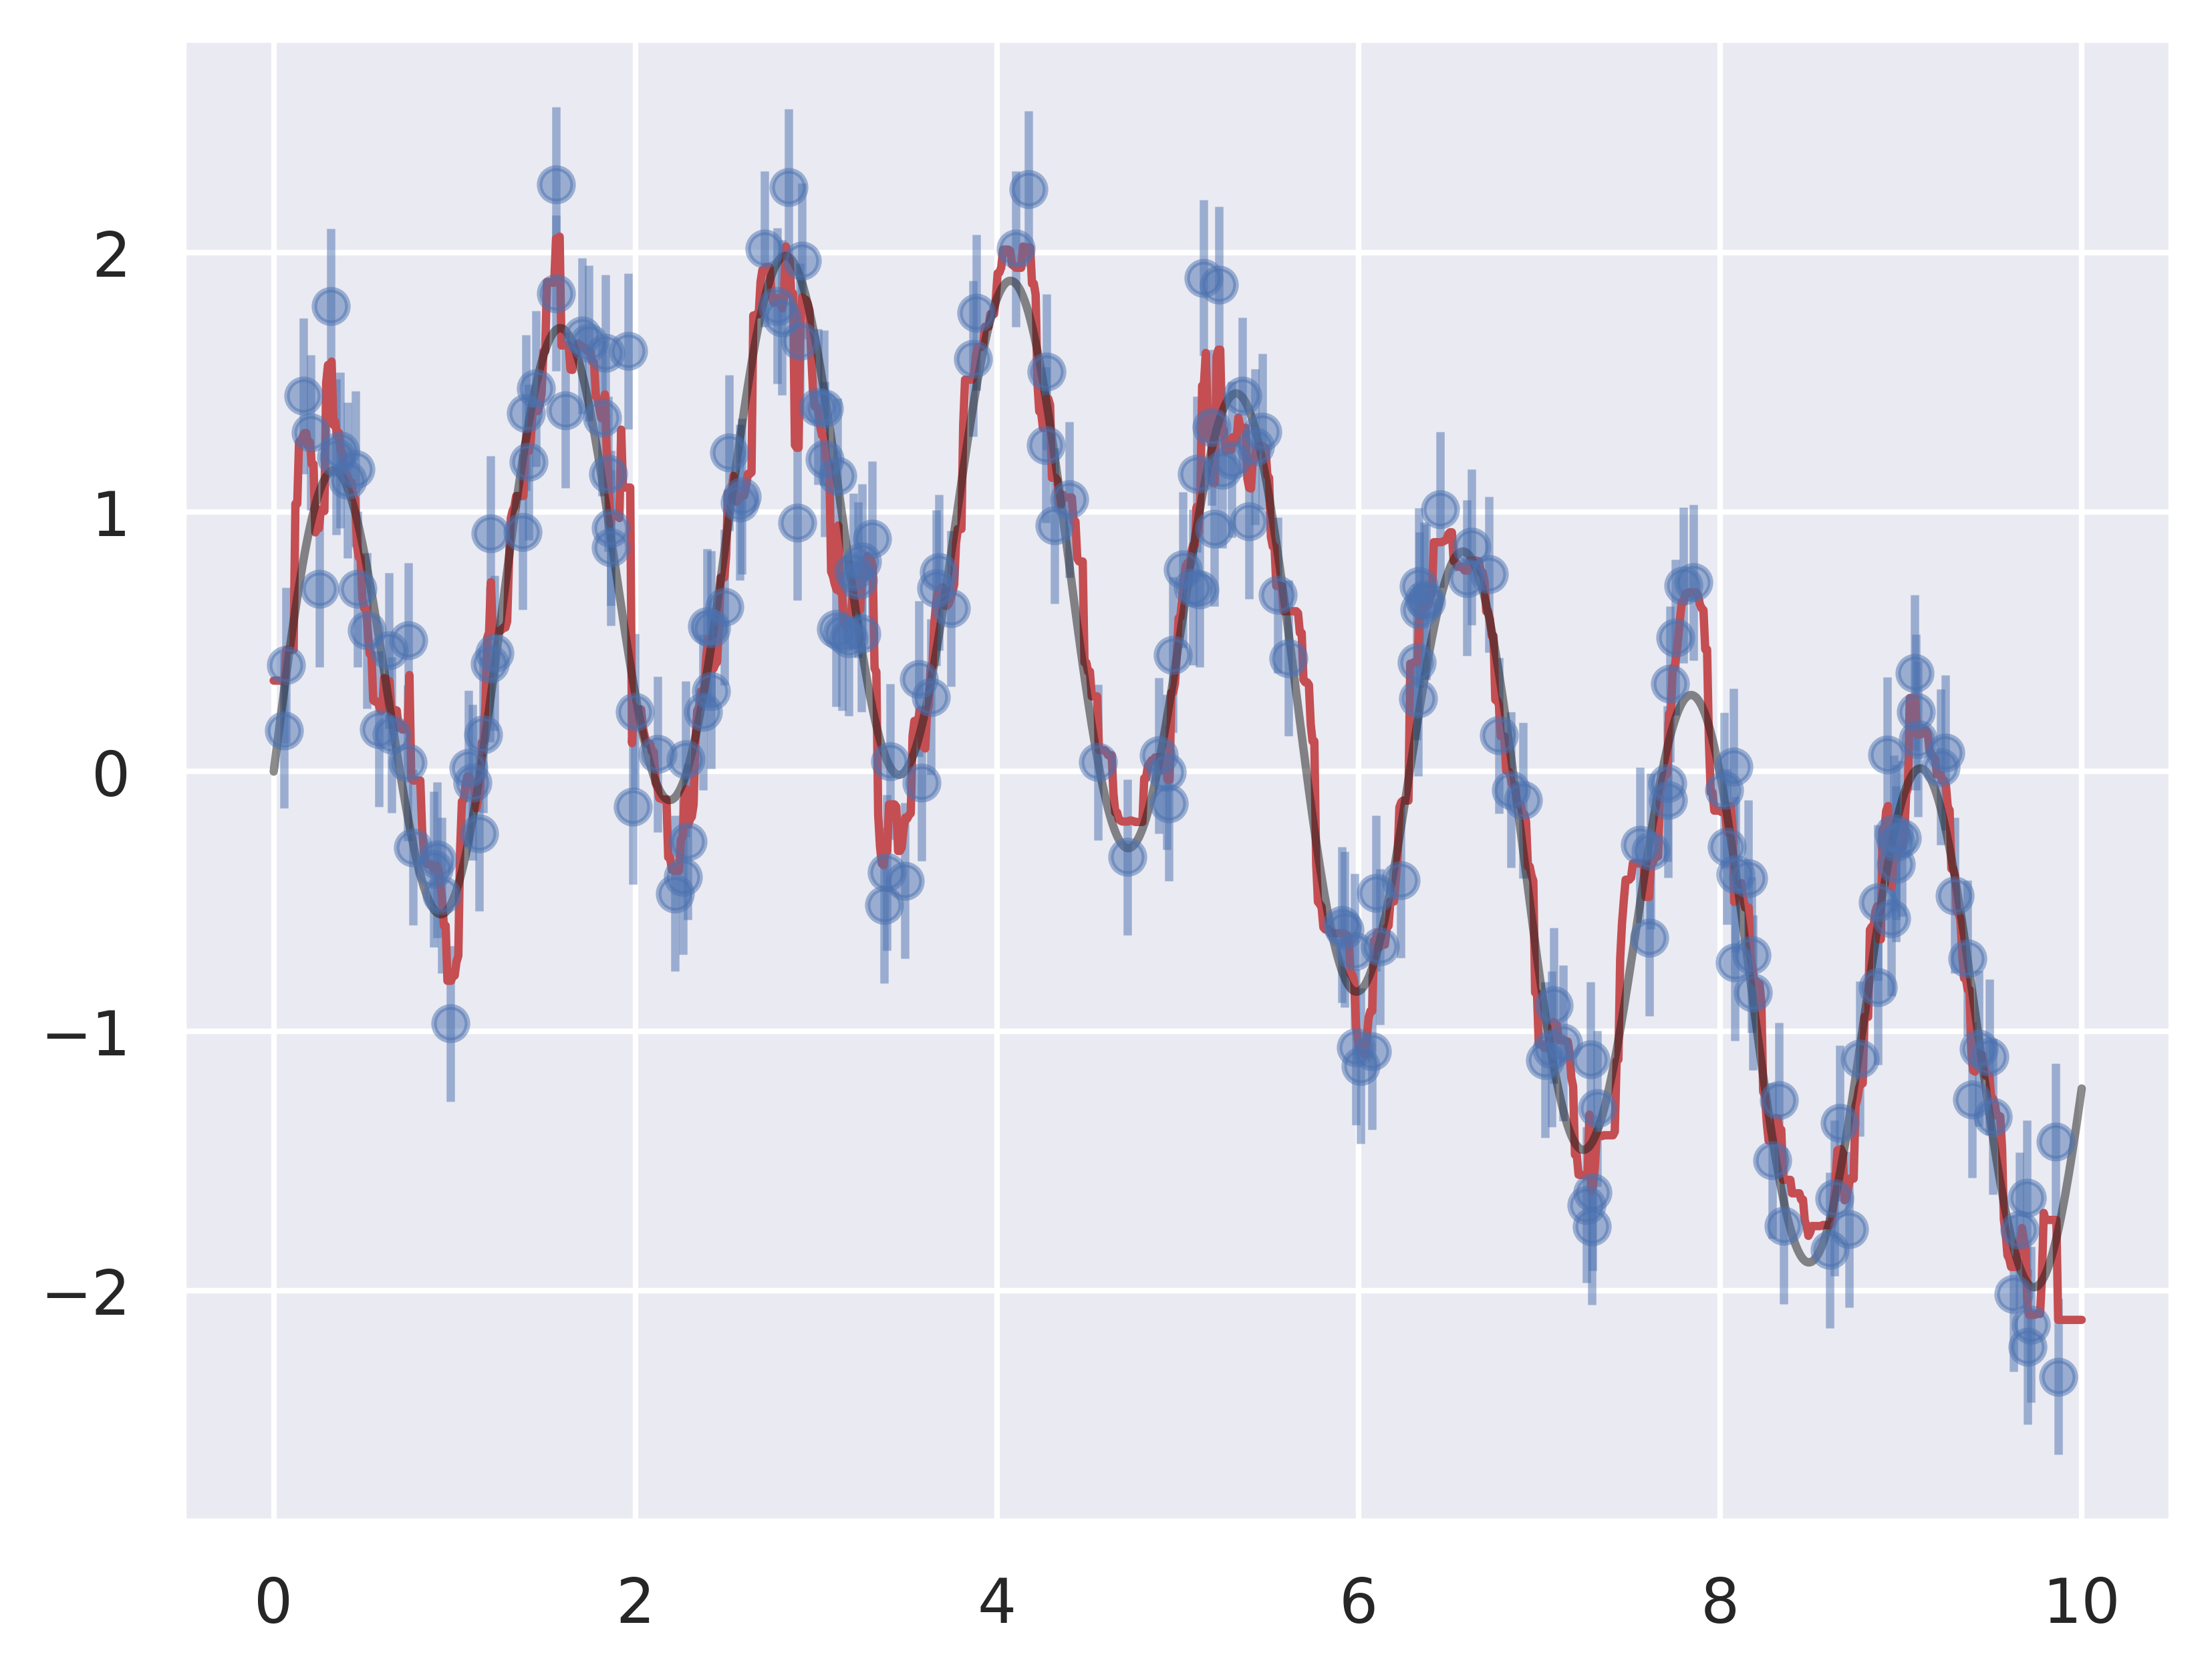

In [26]:
forest = RandomForestRegressor(200)
forest.fit(x[:, None], y)

xfit = np.linspace(0, 10, 1000)
yfit = forest.predict(xfit[:, None])
ytrue = model(xfit, sigma=0)

plt.errorbar(x, y, 0.3, fmt='o', alpha=0.5)
plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-k', alpha=0.5)

# Example: Random Forest for Classifying Digits

In [28]:
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

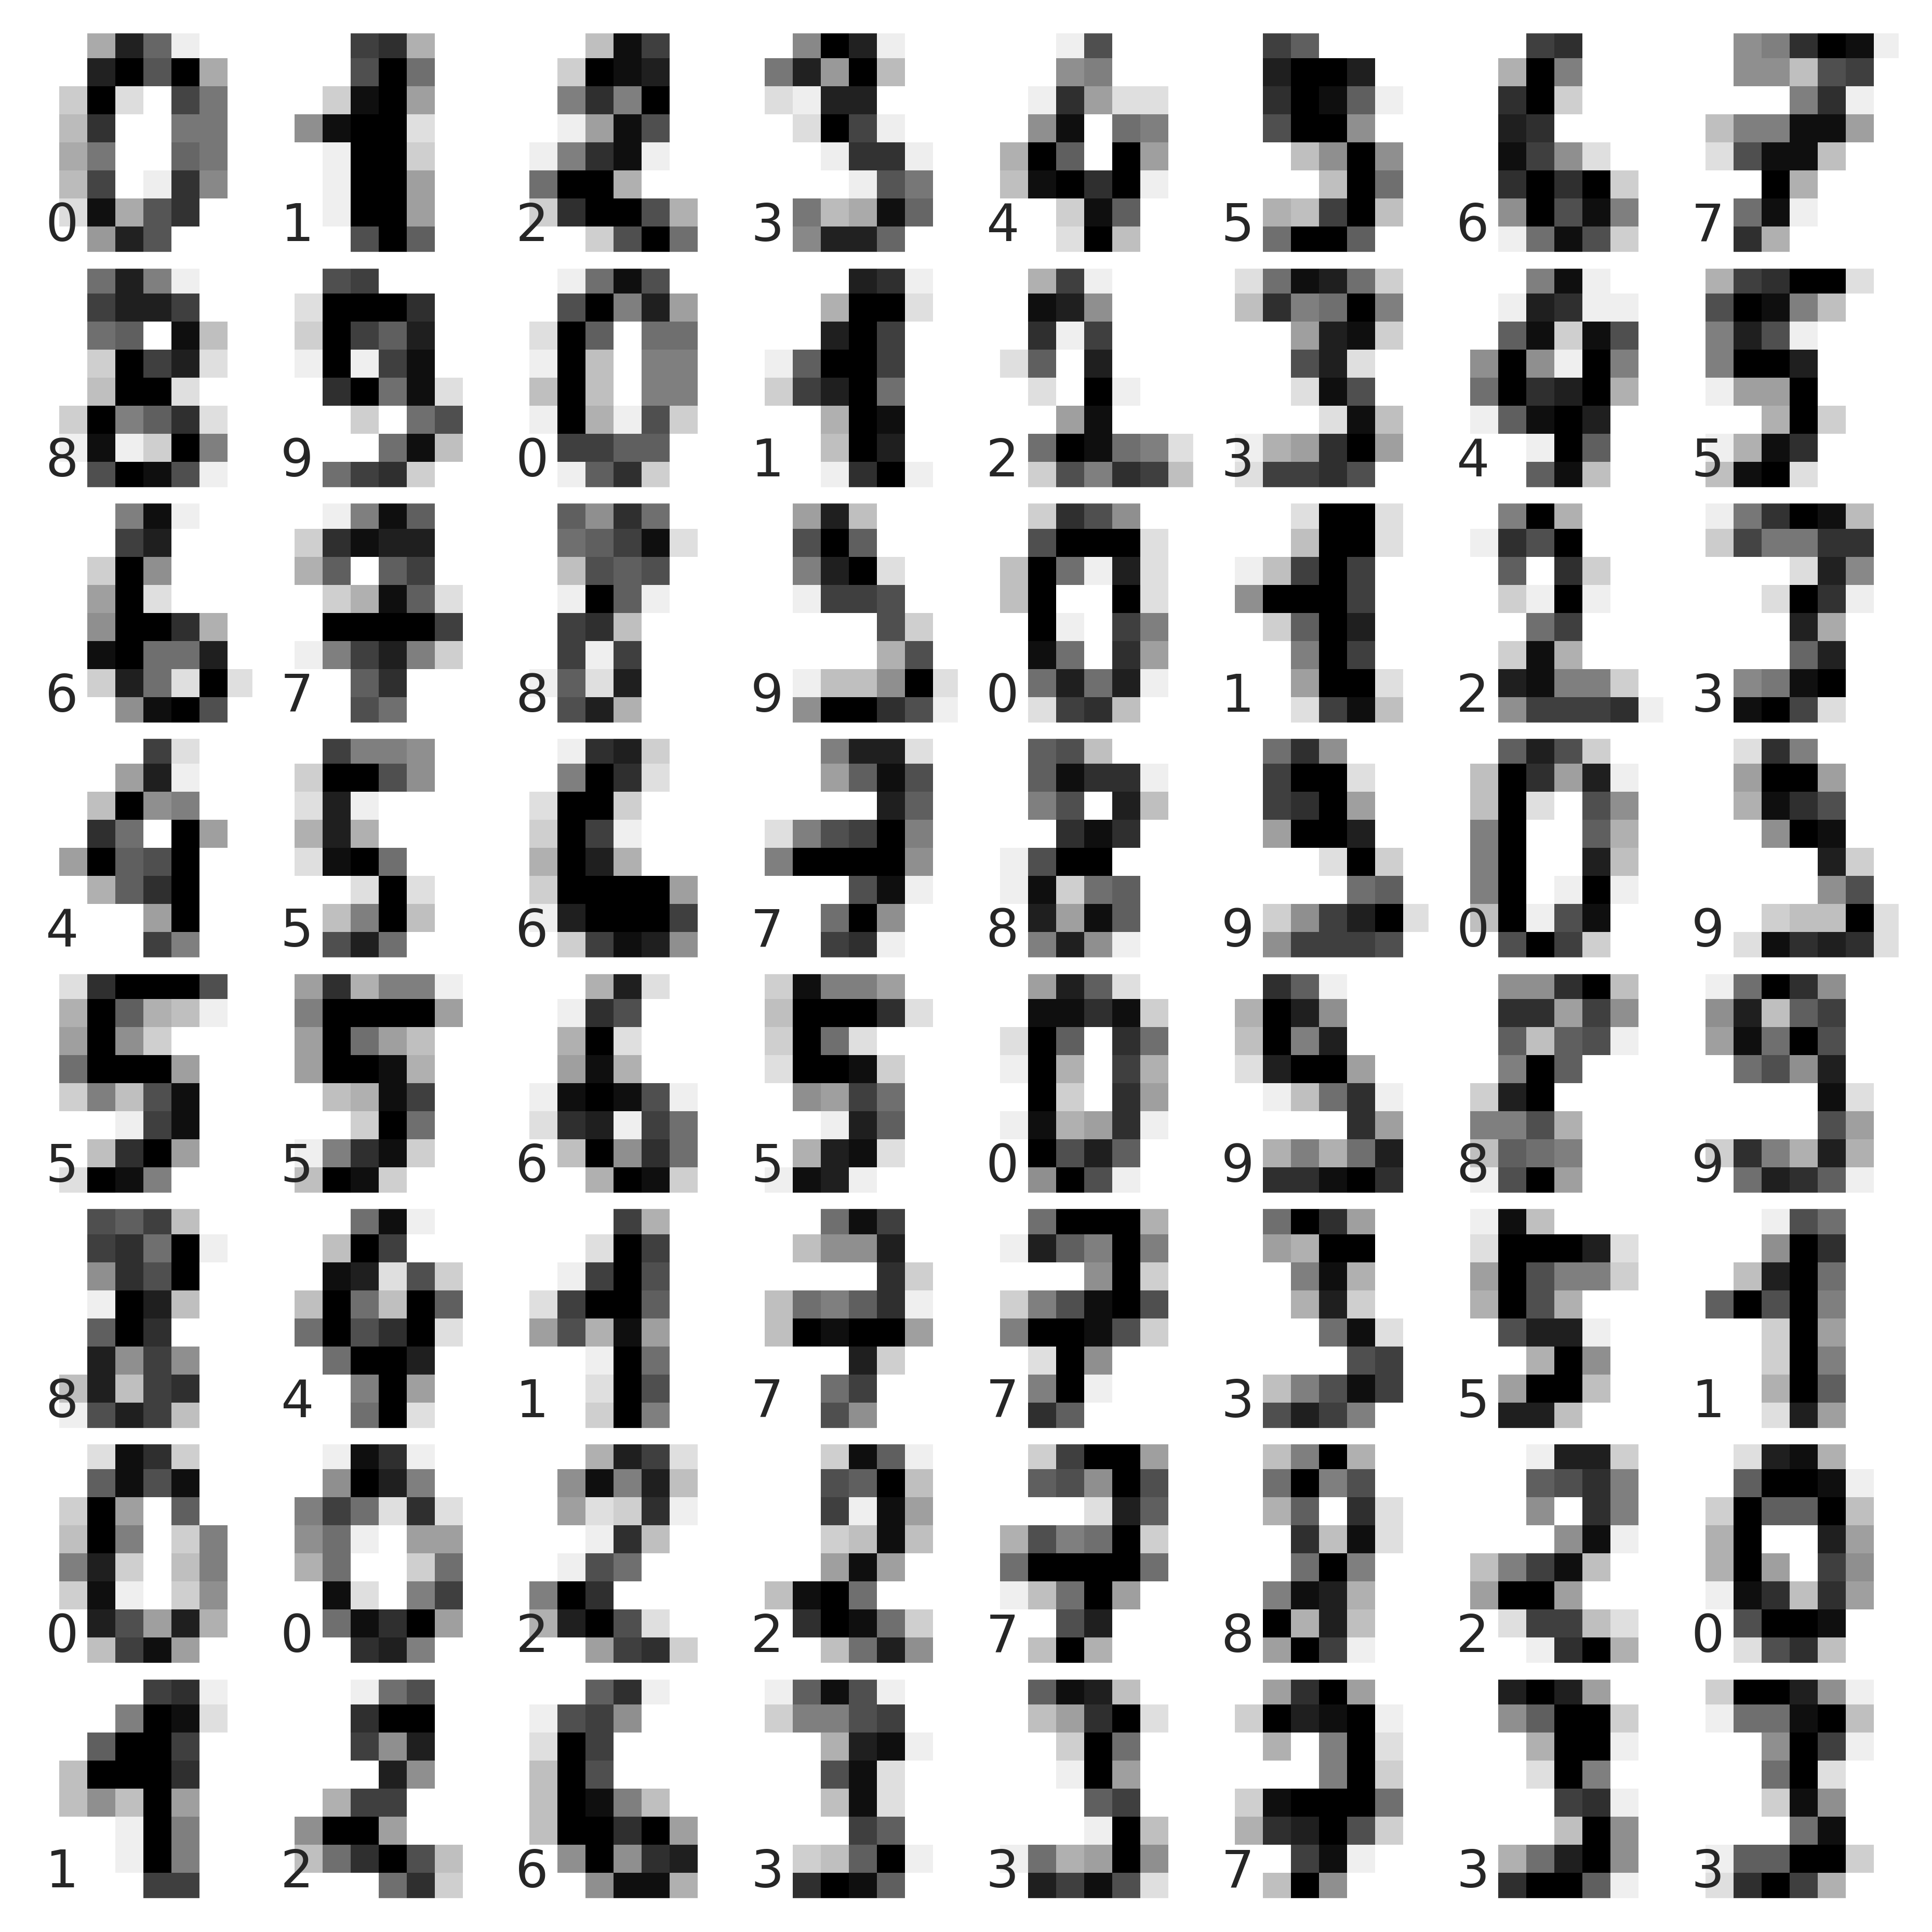

In [29]:
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')

    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

In [33]:
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target, random_state=0)

model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

I always print the classification report when working with machine learning algorithms using sklearn.

- Precision: percentage of correct positive predictions relative to total positive predictions.

- Recall: Percentage of correct positive predictions relative to total actual positives.

- F1 Score: Weighted harmonic mean of precision and recall. The closer to 1, the better the model.

In [34]:
print(metrics.classification_report(ypred, ytest))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       1.00      0.96      0.98        45
           2       0.95      1.00      0.98        42
           3       0.98      0.98      0.98        45
           4       0.97      1.00      0.99        37
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       1.00      0.96      0.98        50
           8       0.94      0.98      0.96        46
           9       0.98      0.98      0.98        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



 Also, printin a confusion matrix is always important!

 A confusion matrix, it's a table that is used in classification problems to assess where errors in the model were made.

The rows represent the actual classes the outcomes should have been. While the columns represent the predictions we have made. Using this table it is easy to see which predictions are wrong.

Text(656.7, 0.5, 'predicted label')

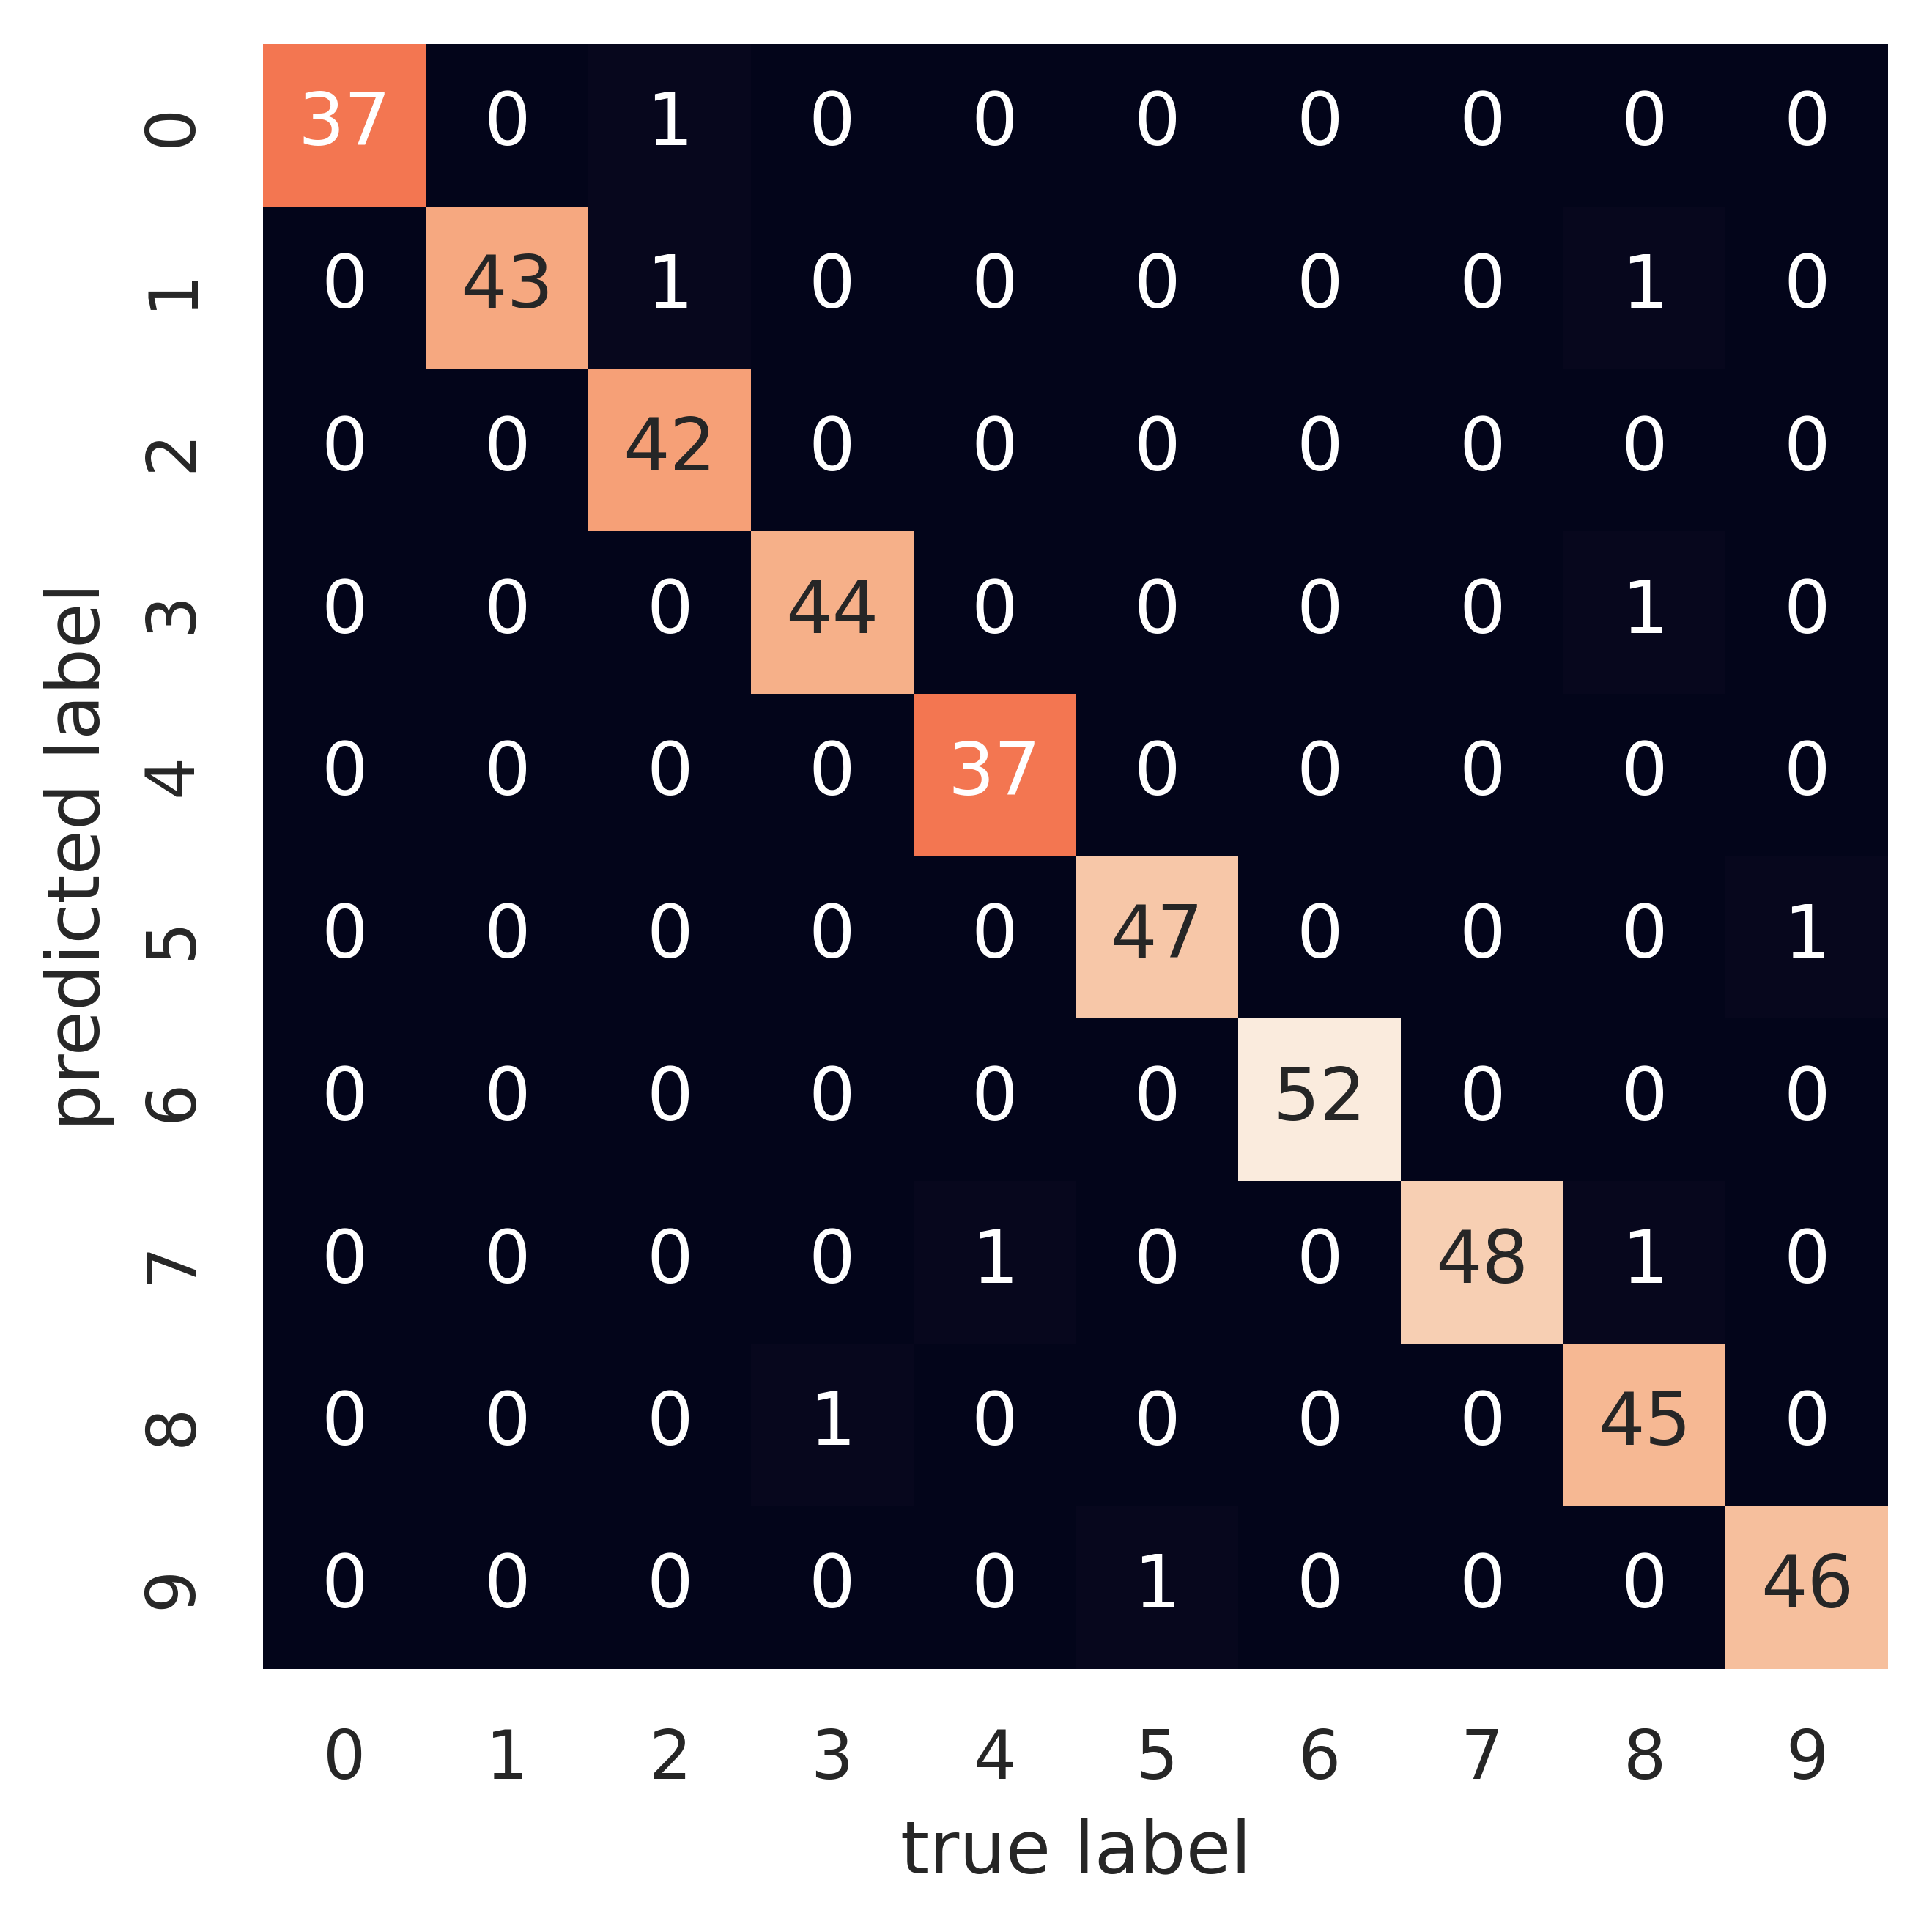

In [35]:
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

# Sources:

- Decision trees: https://www.geeksforgeeks.org/decision-tree/
- Decision tree classifier: https://scikit-learn.org/dev/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- Random Forest: https://www.geeksforgeeks.org/random-forest-algorithm-in-machine-learning/
- Bagging classifier: https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.BaggingClassifier.html
- Random forest classifieer: https://www.geeksforgeeks.org/random-forest-classifier-using-scikit-learn/
- Random Forest Regression: https://www.geeksforgeeks.org/random-forest-regression-in-python/
- Classification report: https://www.statology.org/sklearn-classification-report/
- https://www.w3schools.com/python/python_ml_confusion_matrix.asp